In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report


C:\Users\User\AppData\Local\Temp\ipykernel_14204\340493911.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# 시스템에 설치된 한글 폰트 설정
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### Feature - 상대치

In [4]:
feature = pd.read_csv('./data/all_feature.csv', encoding='cp949')

### 피쳐 수집기간 (2013.04.01 ~ 2023.12.01) 자르기
feature = feature.iloc[1 : 130]

### 날짜 datatime 형식으로 변환
feature['날짜'] = pd.to_datetime(feature['날짜'])

### 분기데이터랑 BSI지수 제외 나머지 컬럼 가져오기
feature = feature[['건설수주액(십억원)','WTI값','경상수지(증감율)', '미국생산자물가지수', '소비자심리지수_증감률', '실업급여지급건수_증감률','전국_종합매매가격지수_증감률', '전체임금총액_증감률', '국내소매판매액불변지수', '국내소매판매액계절조정지수', '전체실업률','청년실업율(15~29세)', '전업생산지수', '달러인덱스', '미국ISM', '미국PMI', '미국건설지출','미국고용지표_취업자수 증감률', '미국비농업고용자수_증감률']]
feature = pd.DataFrame(feature)

#feature

In [5]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 1 to 128
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   건설수주액(십억원)       128 non-null    float64
 1   WTI값             128 non-null    float64
 2   경상수지(증감율)        128 non-null    float64
 3   미국생산자물가지수        128 non-null    float64
 4   소비자심리지수_증감률      128 non-null    float64
 5   실업급여지급건수_증감률     128 non-null    float64
 6   전국_종합매매가격지수_증감률  128 non-null    float64
 7   전체임금총액_증감률       128 non-null    float64
 8   국내소매판매액불변지수      128 non-null    float64
 9   국내소매판매액계절조정지수    128 non-null    float64
 10  전체실업률            128 non-null    float64
 11  청년실업율(15~29세)    128 non-null    float64
 12  전업생산지수           128 non-null    float64
 13  달러인덱스            128 non-null    float64
 14  미국ISM            128 non-null    object 
 15  미국PMI            128 non-null    float64
 16  미국건설지출           128 non-null    float64
 17  미국고용지표_취업자수 증감률 

#### 미국 문자데이터 -> 0으로 대체

In [6]:
feature['미국ISM'] = np.where(feature['미국ISM'] == '#DIV/0!', '0', feature['미국ISM'])
feature.loc[102]['미국ISM']

'0'

In [7]:
# object 타입의 열을 float64로 변환
feature['미국ISM'] = feature['미국ISM'].astype(float)


### Feature - 절대치

In [27]:
absolute_feature = pd.read_csv('./data/absolute_feature.csv', encoding='cp949') #

### 피쳐 수집기간 (2013.04.01 ~ 2023.12.01) 자르기
absolute_feature = absolute_feature.iloc[0 : 130]

### 날짜 datatime 형식으로 변환
absolute_feature['날짜'] = pd.to_datetime(absolute_feature['날짜'])

### 분기데이터랑 BSI지수 제외 나머지 컬럼 가져오기
absolute_feature = absolute_feature[['건설수주액(십억원)','WTI값','미국생산자물가지수', '경상수지','소비자심리지수_절대','전국_종합매매가격지수_절대','전체임금총액_절대','계절조정지수', '고용률','경상지수','국내소매판매액불변지수','국내소매판매액계절조정지수','전체실업률', '청년실업율(15~29세)','달러인덱스','전산업생산지수','달러인덱스','미국ISM','미국PMI','미국고용지표_취업자수 증감(만명)','미국비농업고용자수']]

absolute_feature = pd.DataFrame(absolute_feature)
#absolute_feature



In [28]:
absolute_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   건설수주액(십억원)          129 non-null    float64
 1   WTI값                129 non-null    float64
 2   미국생산자물가지수           129 non-null    float64
 3   경상수지                129 non-null    float64
 4   소비자심리지수_절대          129 non-null    float64
 5   전국_종합매매가격지수_절대      129 non-null    float64
 6   전체임금총액_절대           129 non-null    int64  
 7   계절조정지수              129 non-null    float64
 8   고용률                 129 non-null    float64
 9   경상지수                129 non-null    float64
 10  국내소매판매액불변지수         129 non-null    float64
 11  국내소매판매액계절조정지수       129 non-null    float64
 12  전체실업률               129 non-null    float64
 13  청년실업율(15~29세)       129 non-null    float64
 14  달러인덱스               129 non-null    float64
 15  전산업생산지수             129 non-null    float64
 16  달러인덱스   

In [29]:
absolute_feature['미국비농업고용자수'] = absolute_feature['미국비농업고용자수'].astype(float)
absolute_feature['전체임금총액_절대'] = absolute_feature['전체임금총액_절대'].astype(float)

## EDA

In [30]:
### 피쳐 기술통계량 확인
feature.describe()

,건설수주액(십억원),WTI값,경상수지(증감율),미국생산자물가지수,소비자심리지수_증감률,실업급여지급건수_증감률,전국_종합매매가격지수_증감률,전체임금총액_증감률,국내소매판매액불변지수,국내소매판매액계절조정지수,전체실업률,청년실업율(15~29세),전업생산지수,달러인덱스,미국ISM,미국PMI,미국건설지출,미국고용지표_취업자수 증감률,미국비농업고용자수_증감률
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.045696,0.006157,0.345340,0.001910,0.000260,0.008372,0.001171,0.006652,0.003321,0.001861,0.001527,0.000709,0.001908,0.001869,-0.005656,-0.000110,0.000009,0.565738,0.001229
std,0.286375,0.130263,3.897620,0.010652,0.039529,0.109950,0.004056,0.094116,0.052190,0.019728,0.065164,0.070633,0.010070,0.019248,0.124214,0.037642,0.000086,4.233088,0.012796
min,-0.566412,-0.542400,-10.448616,-0.032241,-0.186735,-0.255157,-0.016900,-0.217500,-0.125749,-0.052114,-0.176471,-0.200000,-0.031853,-0.049569,-1.000000,-0.168932,-0.000290,-6.344697,-0.135701
25%,-0.152178,-0.060175,-0.362844,-0.002694,-0.017433,-0.071054,0.000100,-0.040775,-0.033558,-0.009897,-0.033929,-0.038586,-0.005189,-0.013126,-0.056621,-0.016310,-0.000040,-0.394730,0.001101
50%,-0.003446,0.005200,-0.038288,0.002350,0.005170,-0.011639,0.001150,-0.007300,0.006375,0.004017,0.000000,0.000000,0.002039,0.003217,0.000000,-0.001931,0.000010,-0.010563,0.001574
75%,0.178473,0.065175,0.267653,0.006725,0.023221,0.068997,0.002900,0.051525,0.032861,0.013358,0.028571,0.044505,0.008594,0.016586,0.053759,0.014754,0.000060,0.562580,0.002107
max,0.917245,0.883800,35.358808,0.034391,0.148699,0.411602,0.010400,0.255100,0.161765,0.051867,0.210526,0.188889,0.028154,0.047999,0.238095,0.263158,0.000220,44.400000,0.034689


In [31]:
absolute_feature.describe()

,건설수주액(십억원),WTI값,미국생산자물가지수,경상수지,소비자심리지수_절대,전국_종합매매가격지수_절대,전체임금총액_절대,계절조정지수,고용률,경상지수,...,국내소매판매액계절조정지수,전체실업률,청년실업율(15~29세),달러인덱스,전산업생산지수,달러인덱스,미국ISM,미국PMI,미국고용지표_취업자수 증감(만명),미국비농업고용자수
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,1.290000e+02,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,128.000000,129.000000,129.000000,129.000000
mean,12661.231457,66.094264,204.334426,60.964837,100.803876,91.428093,3.371767e+06,109.615504,60.863566,97.886822,...,96.555814,3.494574,8.477519,94.922829,100.035659,94.922829,57.642187,53.418605,16.755039,146138.317829
std,4123.439077,21.346768,23.315209,34.371523,7.475976,6.344456,4.458642e+05,12.220957,0.816331,12.256206,...,7.540463,0.463396,1.439577,7.032946,6.866345,7.032946,13.579777,3.874491,190.414081,5984.361749
min,5393.795000,18.840000,178.700000,-42.048000,72.100000,82.689000,2.609844e+06,84.400000,59.100000,75.800000,...,83.300000,2.500000,5.200000,79.532000,89.500000,79.532000,33.500000,38.000000,-2047.700000,130421.000000
25%,9819.192000,49.200000,188.900000,44.865000,98.000000,87.658000,3.026406e+06,100.400000,60.400000,87.500000,...,90.200000,3.200000,7.700000,92.131000,94.600000,92.131000,48.900000,51.600000,16.400000,141820.000000
50%,11950.476000,61.500000,195.200000,67.014000,102.000000,89.929000,3.329311e+06,109.300000,60.700000,96.700000,...,97.800000,3.600000,9.000000,95.735000,99.500000,95.735000,54.750000,53.500000,22.900000,146389.000000
75%,15867.865000,80.560000,210.100000,79.801000,105.500000,95.743000,3.694897e+06,119.800000,61.000000,107.000000,...,103.200000,3.800000,9.500000,98.860000,104.200000,98.860000,66.550000,55.500000,30.700000,150844.000000
max,23729.665000,114.670000,262.418000,124.097000,113.600000,105.193000,4.721940e+06,137.300000,62.700000,122.300000,...,108.500000,4.800000,11.000000,112.084000,113.500000,112.084000,89.800000,62.500000,461.500000,157304.000000


In [13]:
feature.columns

Index(['건설수주액(십억원)', 'WTI값', '경상수지(증감율)', '미국생산자물가지수', '소비자심리지수_증감률',
       '실업급여지급건수_증감률', '전국_종합매매가격지수_증감률', '전체임금총액_증감률', '국내소매판매액불변지수',
       '국내소매판매액계절조정지수', '전체실업률', '청년실업율(15~29세)', '전업생산지수', '달러인덱스', '미국ISM',
       '미국PMI', '미국건설지출', '미국고용지표_취업자수 증감률', '미국비농업고용자수_증감률'],
      dtype='object')

In [33]:
absolute_feature['경상지수']

0       79.8
1       83.9
2       80.7
3       82.6
4       79.6
       ...  
124    113.7
125    120.5
126    118.8
127    121.3
128    122.3
Name: 경상지수, Length: 129, dtype: float64

### 데이터 전처리 Before, After 시각화 (히스토그램, 박스플롯)

C:\Users\User\AppData\Local\Temp\ipykernel_14204\2655905528.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


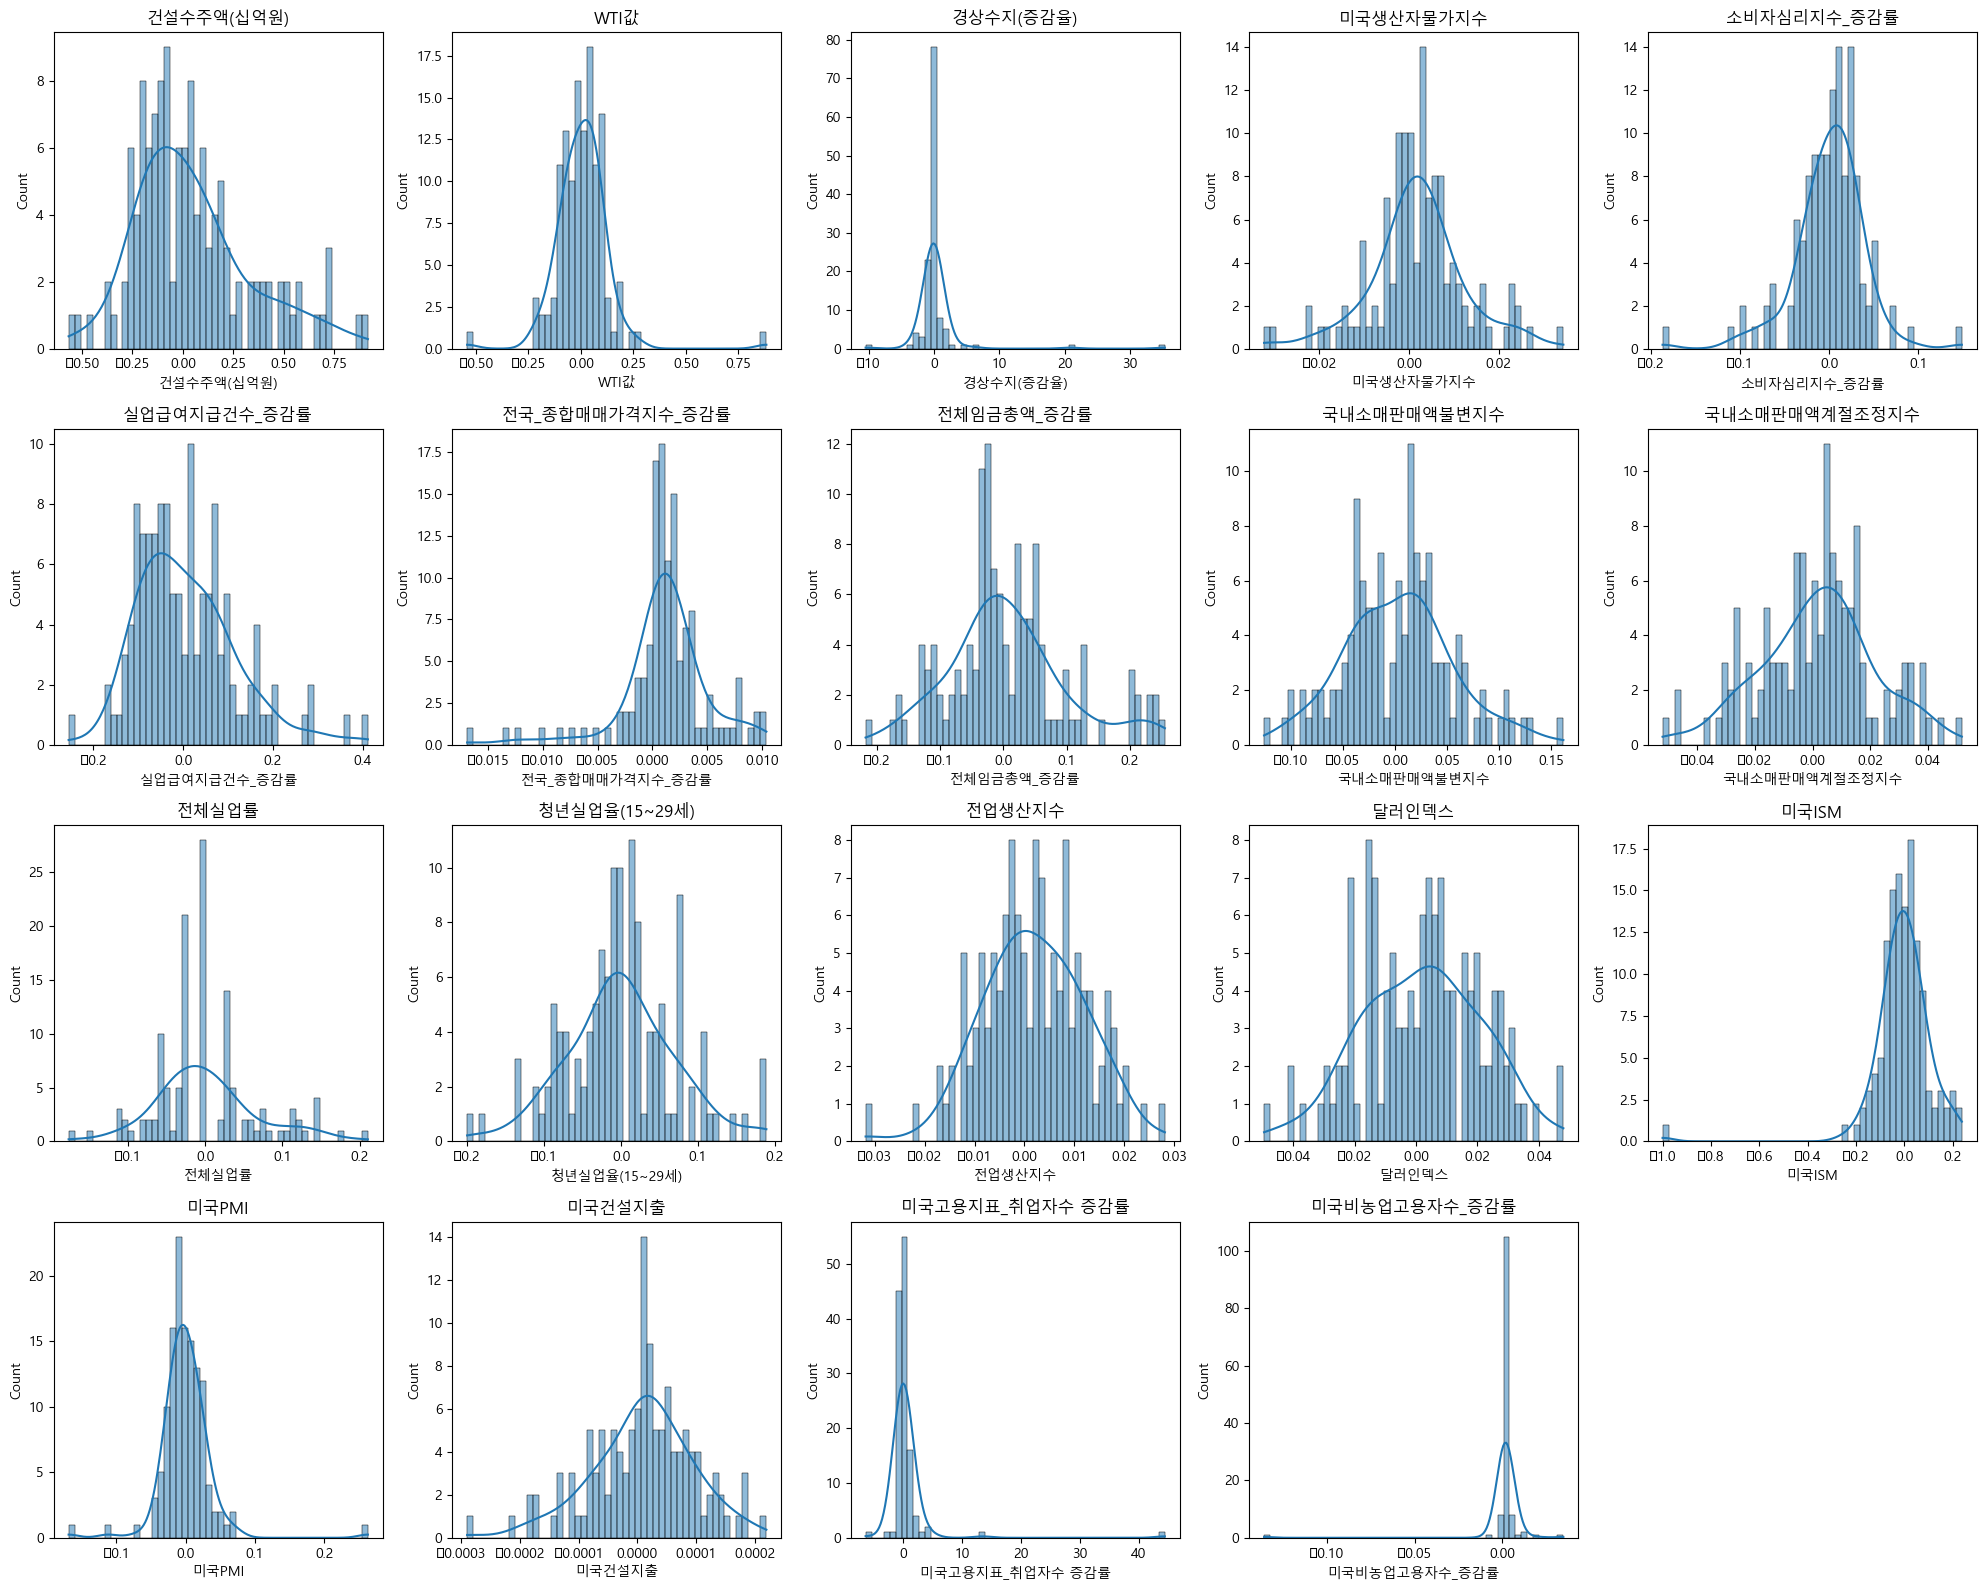

In [15]:
# feature 데이터프레임의 컬럼 수
num_columns = len(feature.columns)

# 플롯을 그릴 행과 열의 개수 계산
num_rows = (num_columns + 4) // 5  # 5개의 열을 가진 그리드를 만듭니다.

# 그리드 생성
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

# 모든 컬럼에 대해 플롯을 그립니다.
for i, column in enumerate(feature.columns):
    row_index = i // 5  # 현재 인덱스의 행 인덱스
    col_index = i % 5   # 현재 인덱스의 열 인덱스
    ax = axes[row_index, col_index]  # 현재 인덱스에 해당하는 서브플롯

    # 히스토그램 그리기
    sns.histplot(feature[column], bins=50, kde=True, ax=ax)
    ax.set_title(column)  # 컬럼 이름으로 제목 설정

# 비어 있는 서브플롯 삭제
for i in range(num_columns, num_rows * 5):
    row_index = i // 5
    col_index = i % 5
    fig.delaxes(axes[row_index, col_index])

# 레이아웃 조정
plt.tight_layout()

# 플롯 표시
plt.show()

#plt.savefig('feature_hi.png', dpi=300, bbox_inches='tight')



C:\Users\User\AppData\Local\Temp\ipykernel_28400\2568459227.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_28400\2568459227.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('absolute_feature_hi.png', dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


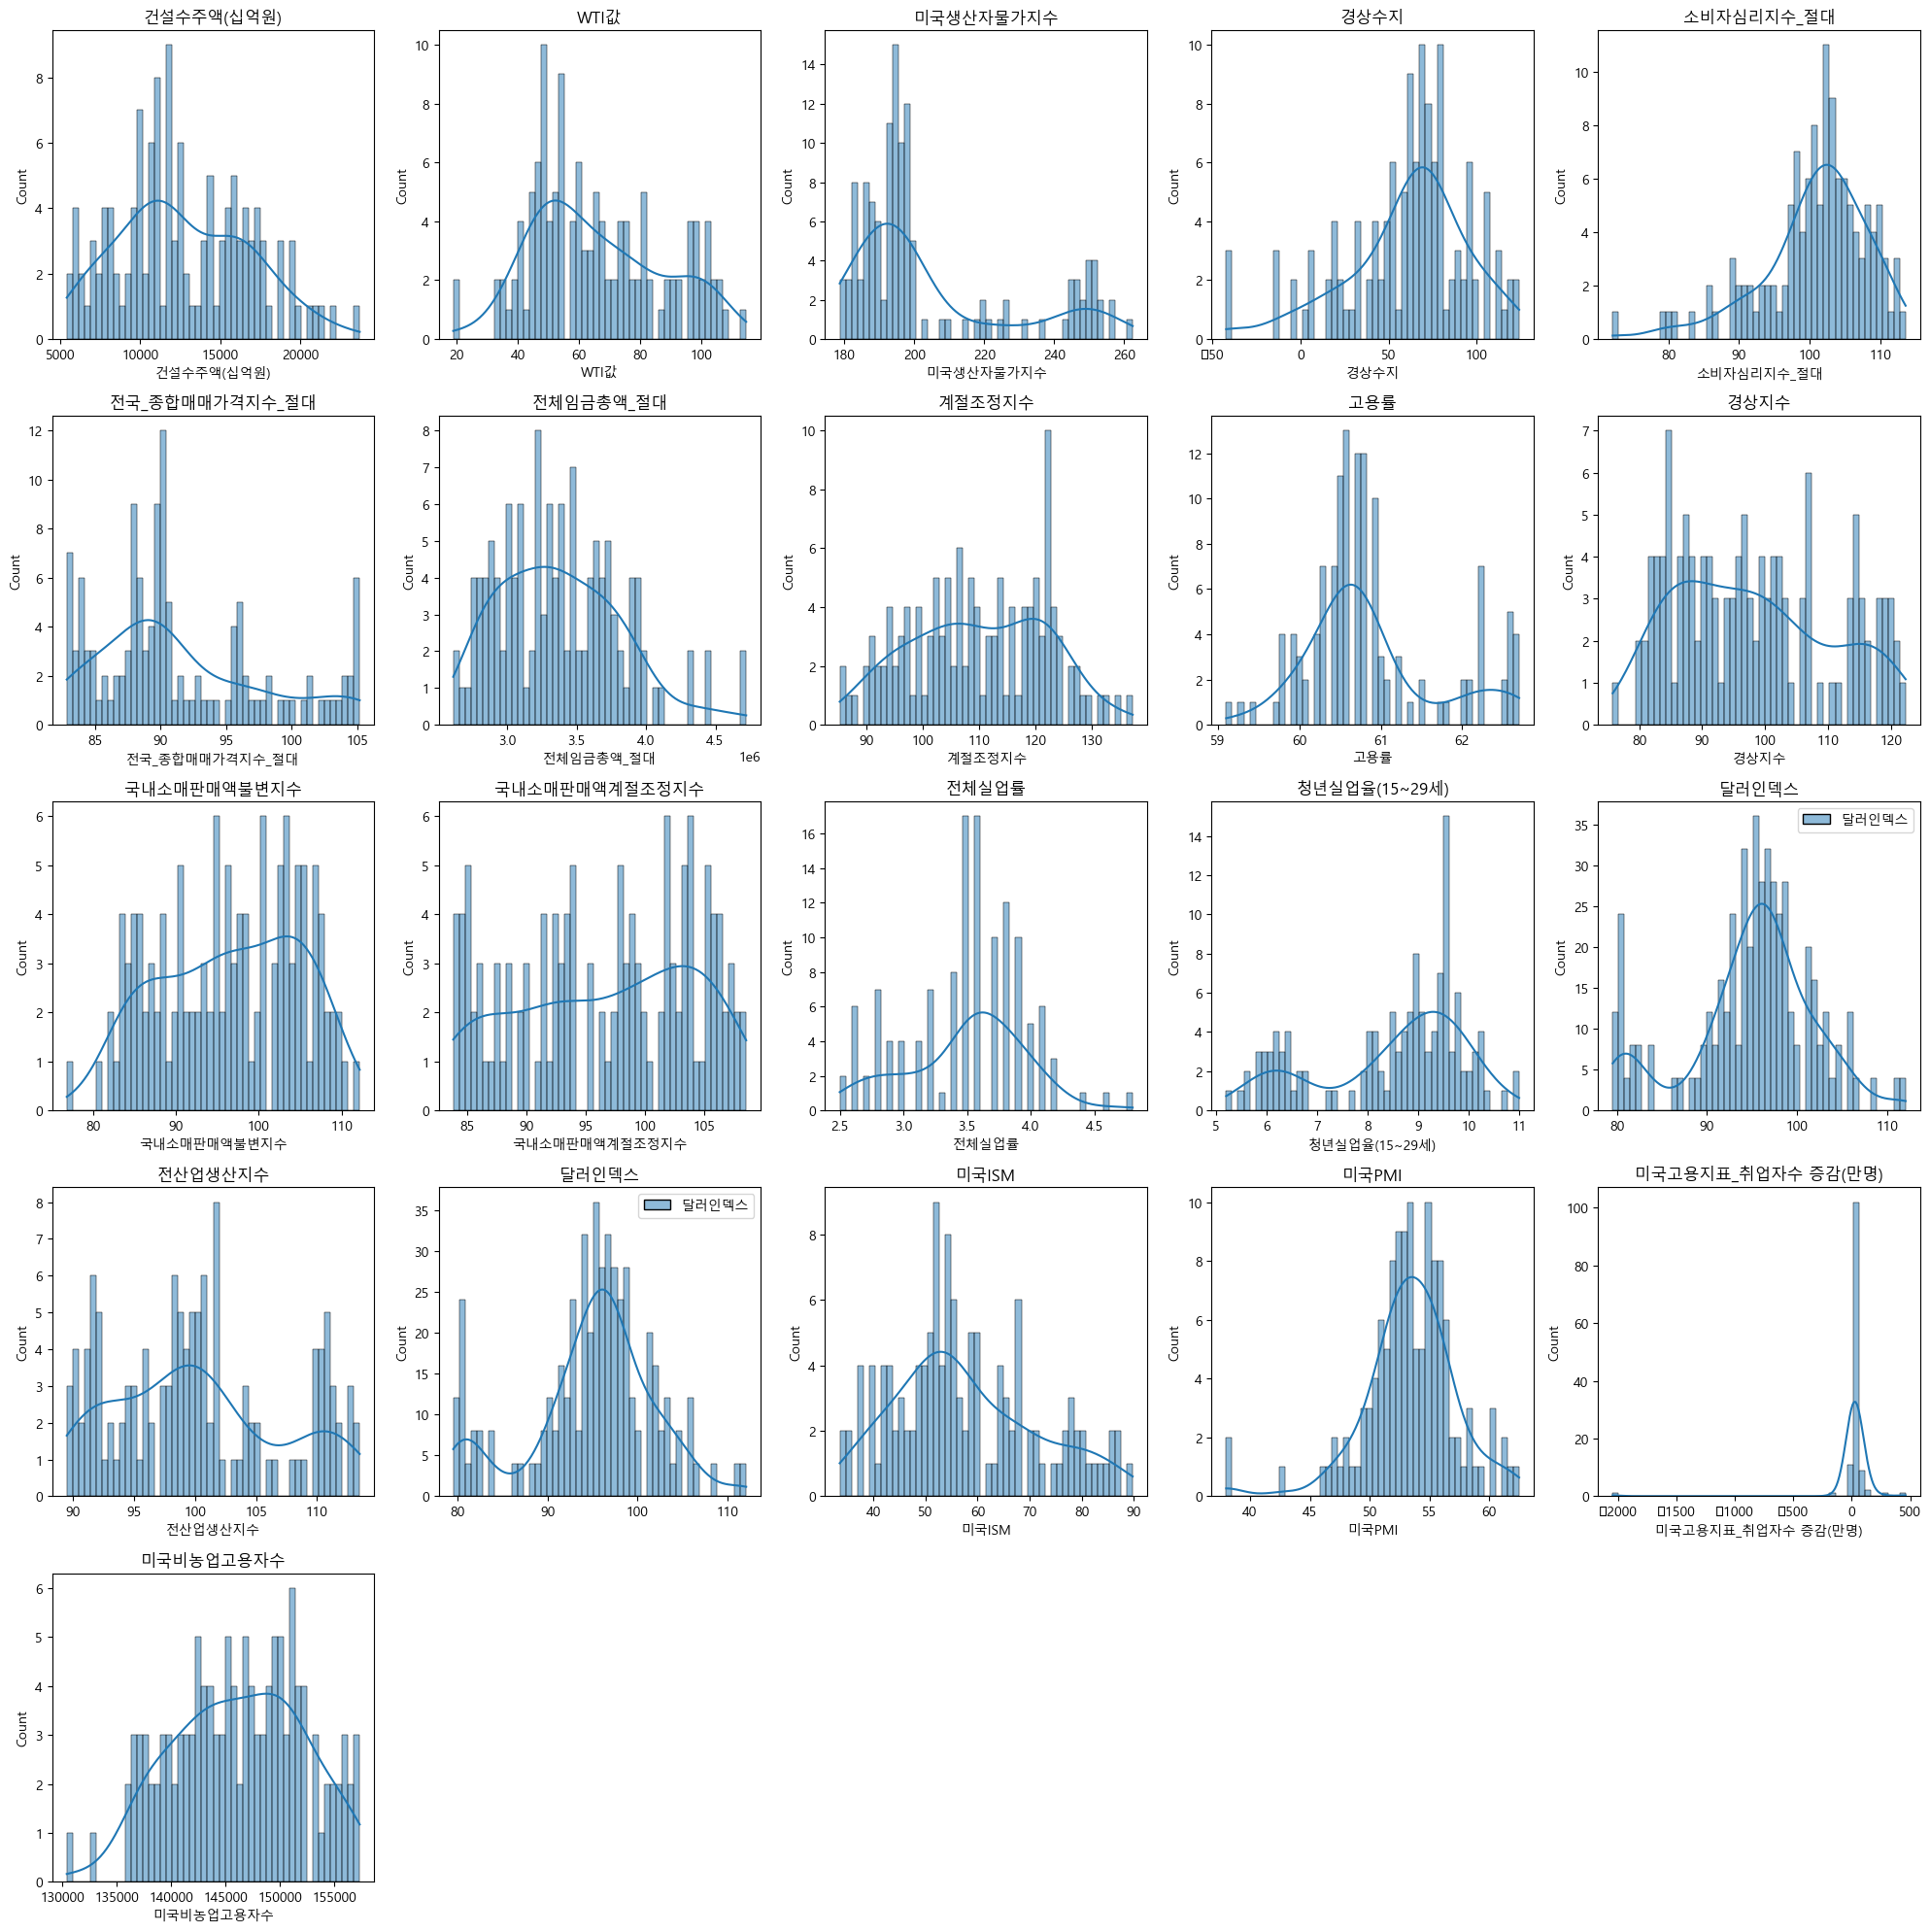

In [ ]:
# feature 데이터프레임의 컬럼 수
num_columns = len(absolute_feature.columns)

# 플롯을 그릴 행과 열의 개수 계산
num_rows = (num_columns + 4) // 5  # 5개의 열을 가진 그리드를 만듭니다.

# 그리드 생성
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

# 모든 컬럼에 대해 플롯을 그립니다.
for i, column in enumerate(absolute_feature.columns):
    row_index = i // 5  # 현재 인덱스의 행 인덱스
    col_index = i % 5   # 현재 인덱스의 열 인덱스
    ax = axes[row_index, col_index]  # 현재 인덱스에 해당하는 서브플롯

    # 히스토그램 그리기
    sns.histplot(absolute_feature[column], bins=50, kde=True, ax=ax)
    ax.set_title(column)  # 컬럼 이름으로 제목 설정

# 비어 있는 서브플롯 삭제
for i in range(num_columns, num_rows * 5):
    row_index = i // 5
    col_index = i % 5
    fig.delaxes(axes[row_index, col_index])

# 레이아웃 조정
plt.tight_layout()

#plt.savefig('absolute_feature_hi.png', dpi=300, bbox_inches='tight')

# 플롯 표시
plt.show()


In [17]:
feature.columns

Index(['건설수주액(십억원)', 'WTI값', '경상수지(증감율)', '미국생산자물가지수', '소비자심리지수_증감률',
       '실업급여지급건수_증감률', '전국_종합매매가격지수_증감률', '전체임금총액_증감률', '국내소매판매액불변지수',
       '국내소매판매액계절조정지수', '전체실업률', '청년실업율(15~29세)', '전업생산지수', '달러인덱스', '미국ISM',
       '미국PMI', '미국건설지출', '미국고용지표_취업자수 증감률', '미국비농업고용자수_증감률'],
      dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_14204\2741685673.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


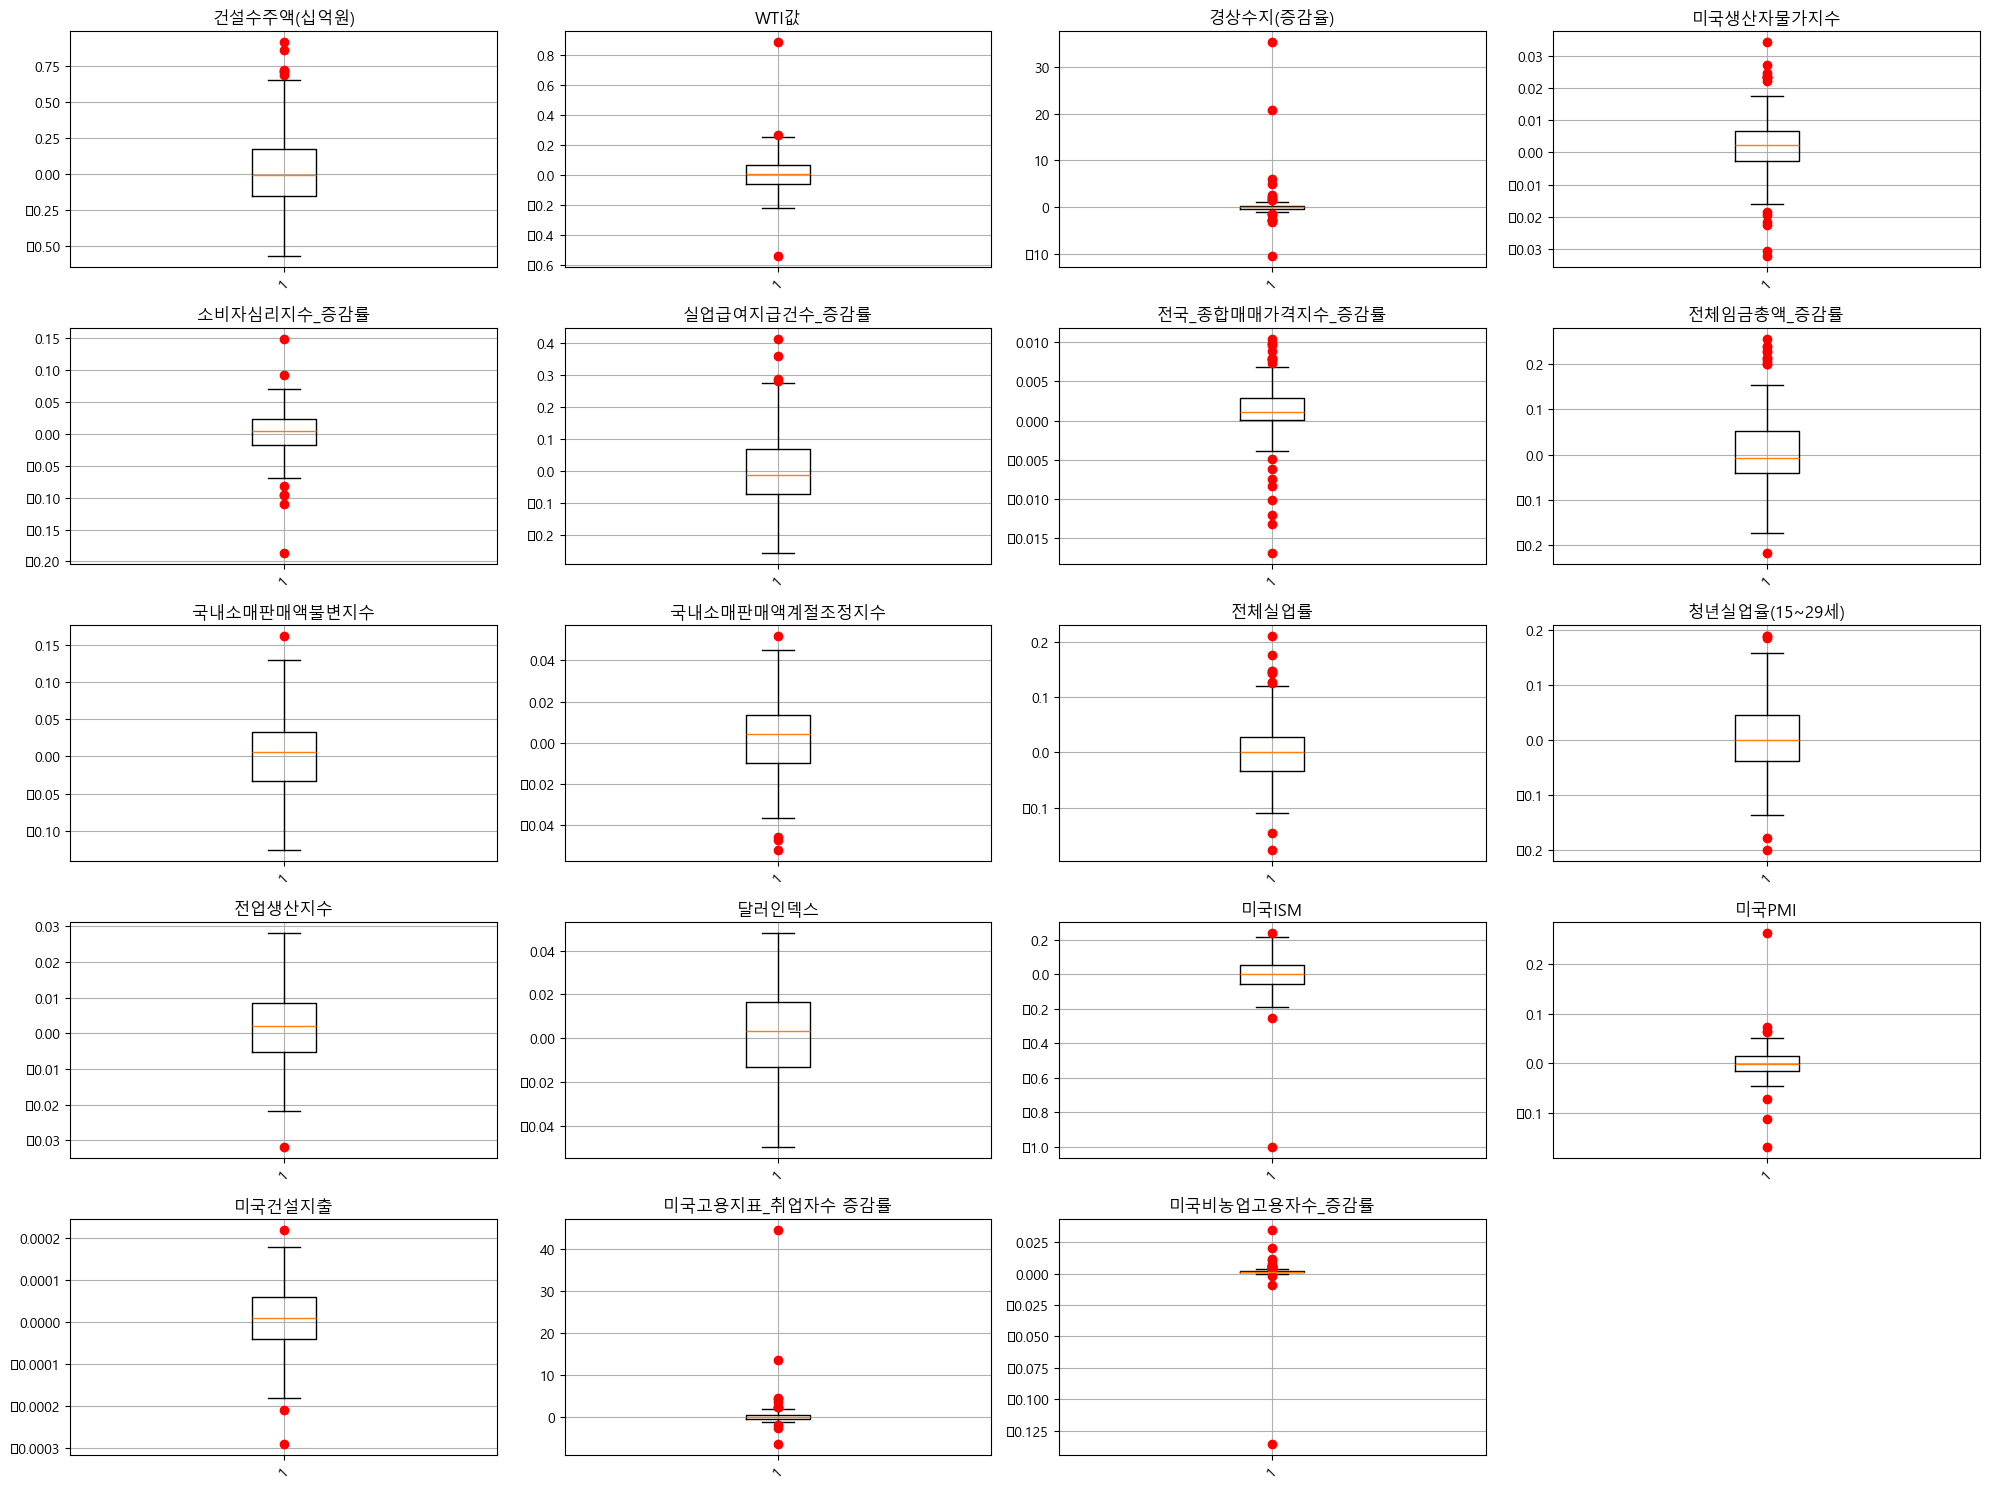

In [22]:
# 그리드 레이아웃 생성
num_cols = 4  # 그리드의 열 개수
num_rows = (len(feature.columns) + num_cols - 1) // num_cols  # 그리드의 행 개수
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# 모든 열에 대해 상자 그림 그리기
for i, column in enumerate(feature.columns):
    ax = axes[i // num_cols, i % num_cols]  # 해당 위치에 축 선택
    ax.boxplot(feature[column], sym='r')
    ax.set_title(column)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# 빈 축 숨기기
for i in range(len(feature.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_28400\610487186.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_28400\610487186.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('feature_QQplot.png', dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


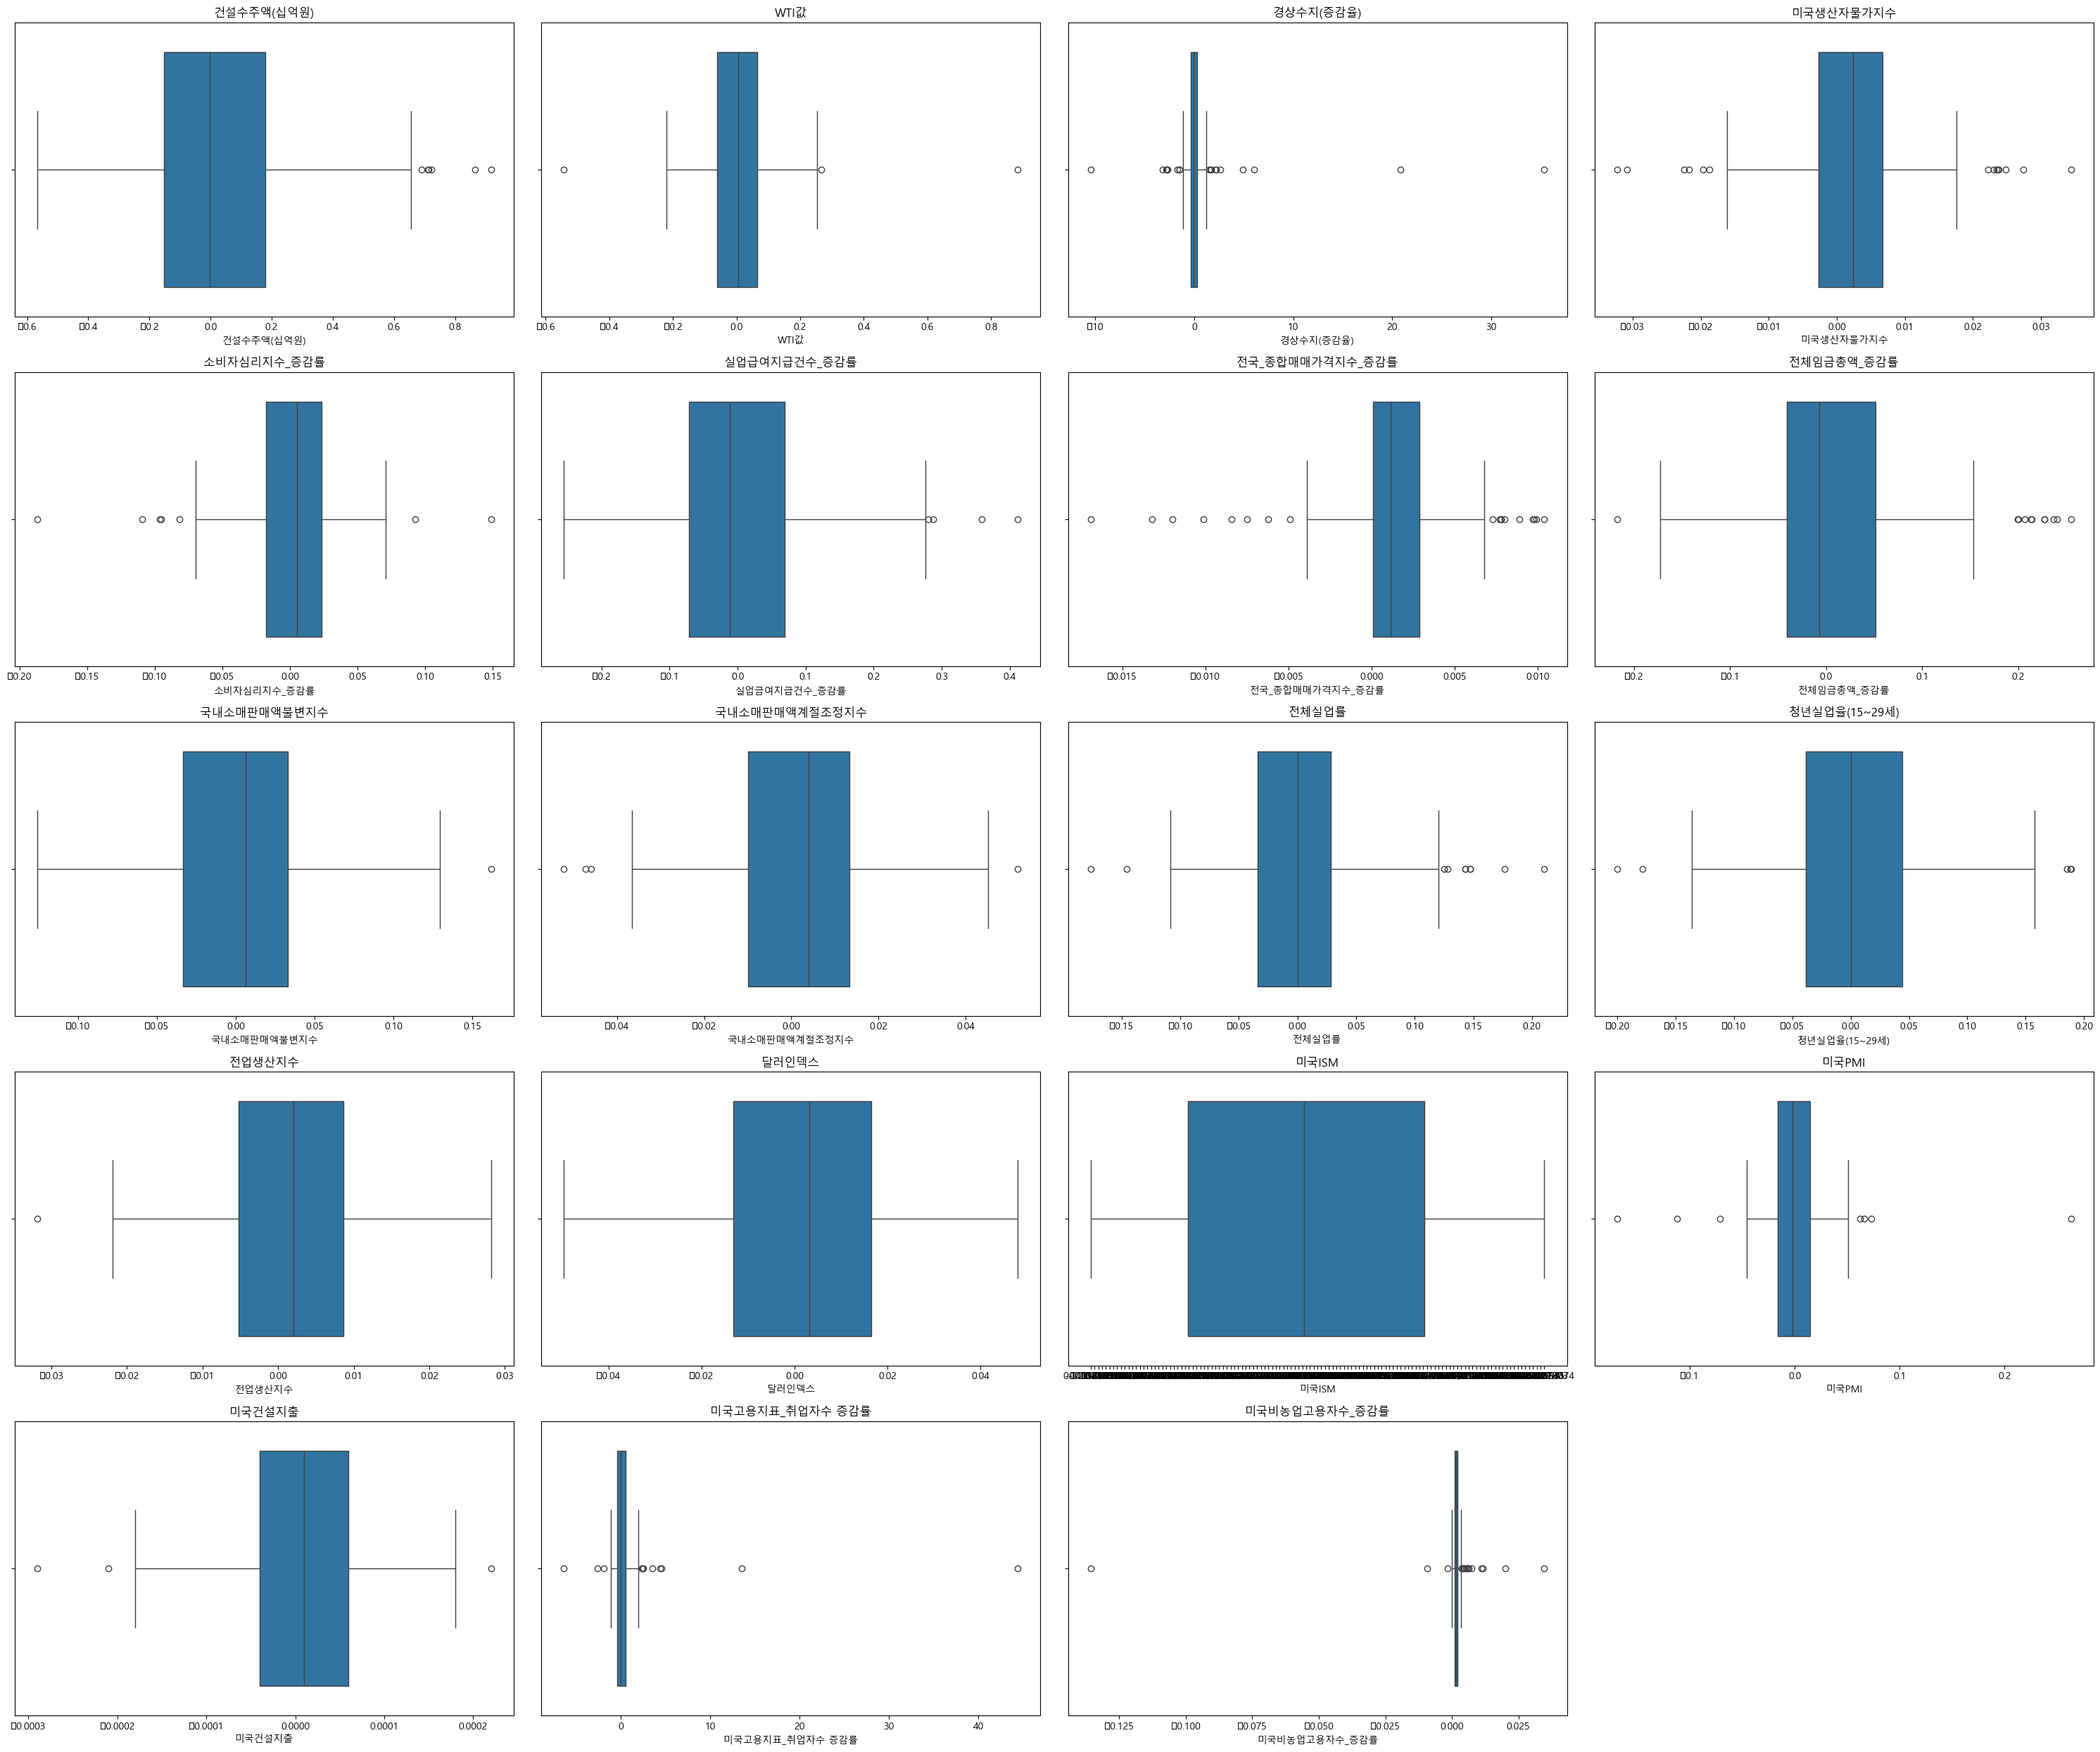

In [ ]:

# 컬럼 수
num_columns = len(feature.columns)

# 그래프의 행과 열 개수 설정
col_n = 4  # 열 개수
row_n = (num_columns + col_n - 1) // col_n  # 행 개수

# 그래프 생성
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30, row_n * 5))

# 모든 컬럼에 대해 시각화
for i, col in enumerate(feature.columns):
    row_index = i // col_n  # 현재 인덱스의 행 인덱스
    col_index = i % col_n   # 현재 인덱스의 열 인덱스

    # 상자 그림 그리기
    sns.boxplot(x=feature[col], ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title(col)  # 컬럼 이름으로 제목 설정

# 비어 있는 서브플롯 삭제
for i in range(num_columns, row_n * col_n):
    row_index = i // col_n
    col_index = i % col_n
    fig.delaxes(ax[row_index, col_index])

# 레이아웃 조정
plt.tight_layout()

#plt.savefig('feature_QQplot.png', dpi=300, bbox_inches='tight')

# 플롯 표시
plt.show()


ValueError: If using all scalar values, you must pass an index

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


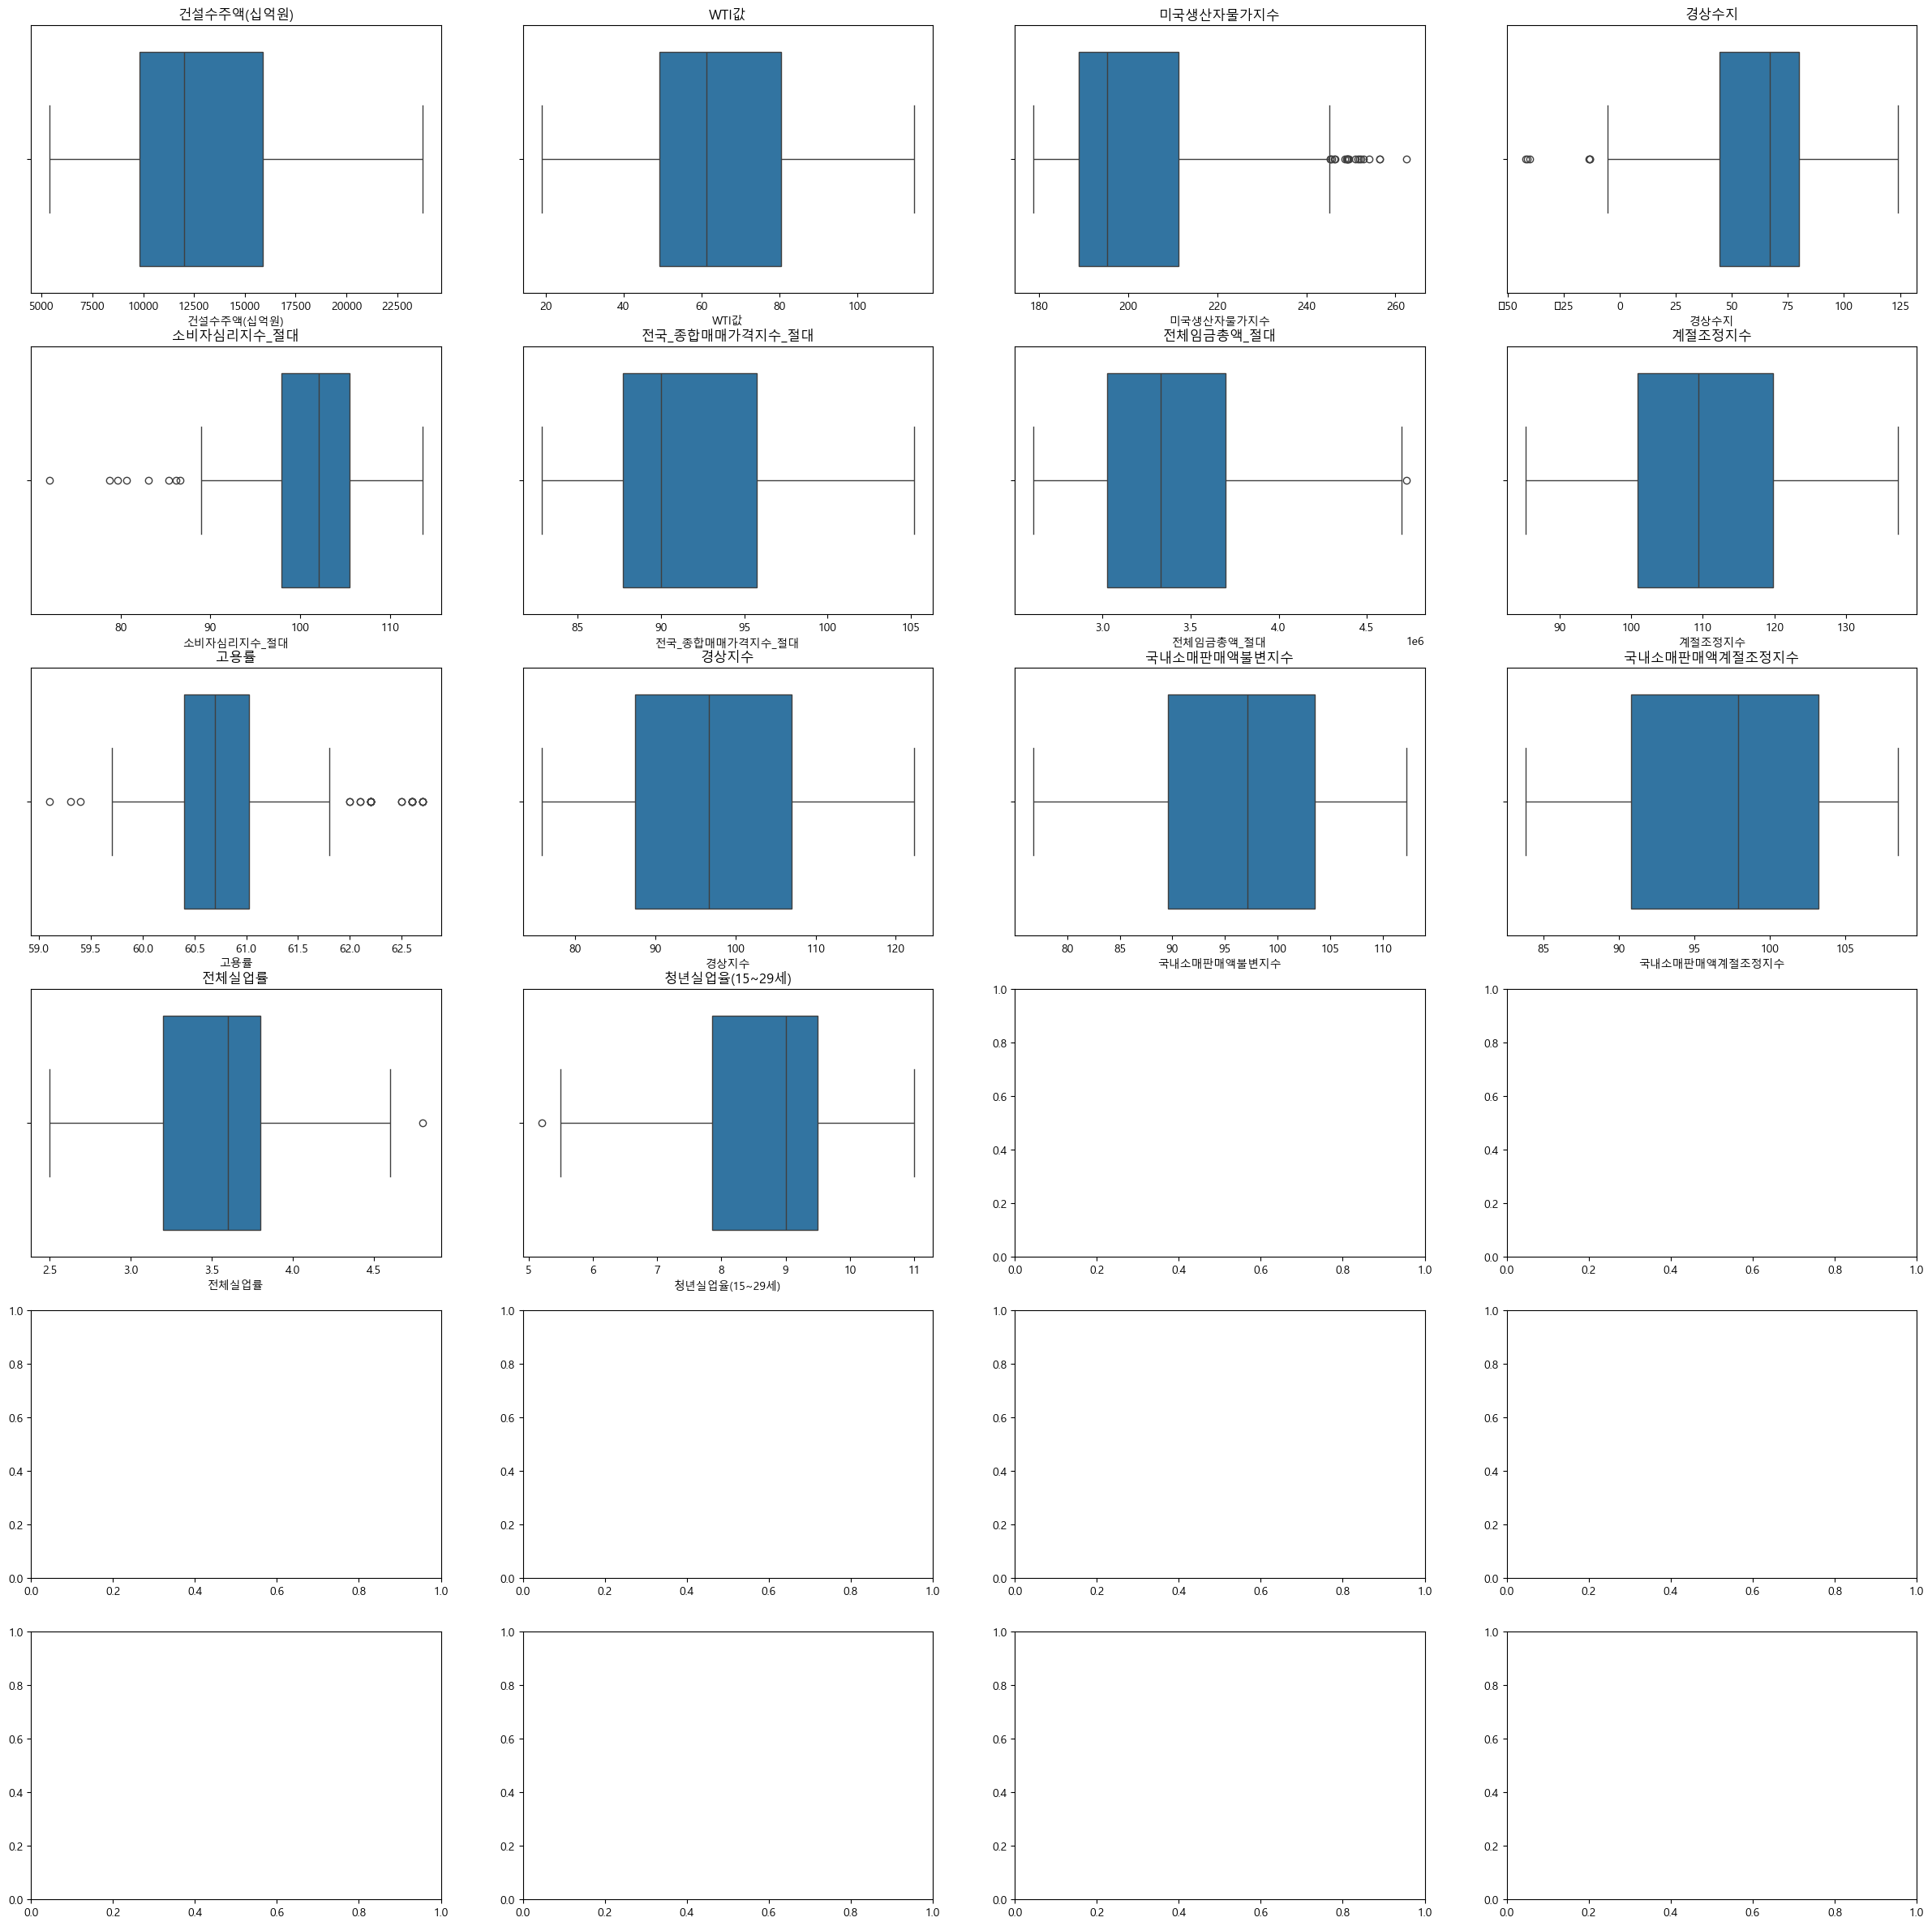

In [ ]:
# 컬럼 수
num_columns = len(absolute_feature.columns)

# 그래프의 행과 열 개수 설정
col_n = 4  # 열 개수
row_n = (num_columns + col_n - 1) // col_n  # 행 개수

# 그래프 생성
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30, row_n * 5))

# 모든 컬럼에 대해 시각화
for i, col in enumerate(absolute_feature.columns):
    row_index = i // col_n  # 현재 인덱스의 행 인덱스
    col_index = i % col_n   # 현재 인덱스의 열 인덱스

    # 상자 그림 그리기
    sns.boxplot(x=absolute_feature[col], ax=ax[row_index, col_index])
    ax[row_index, col_index].set_title(col)  # 컬럼 이름으로 제목 설정

# 비어 있는 서브플롯 삭제
for i in range(num_columns, row_n * col_n):
    row_index = i // col_n
    col_index = i % col_n
    fig.delaxes(ax[row_index, col_index])

plt.savefig('absolute_feature_QQplot.png')

# 레이아웃 조정
plt.tight_layout()

# 플롯 표시
plt.show()

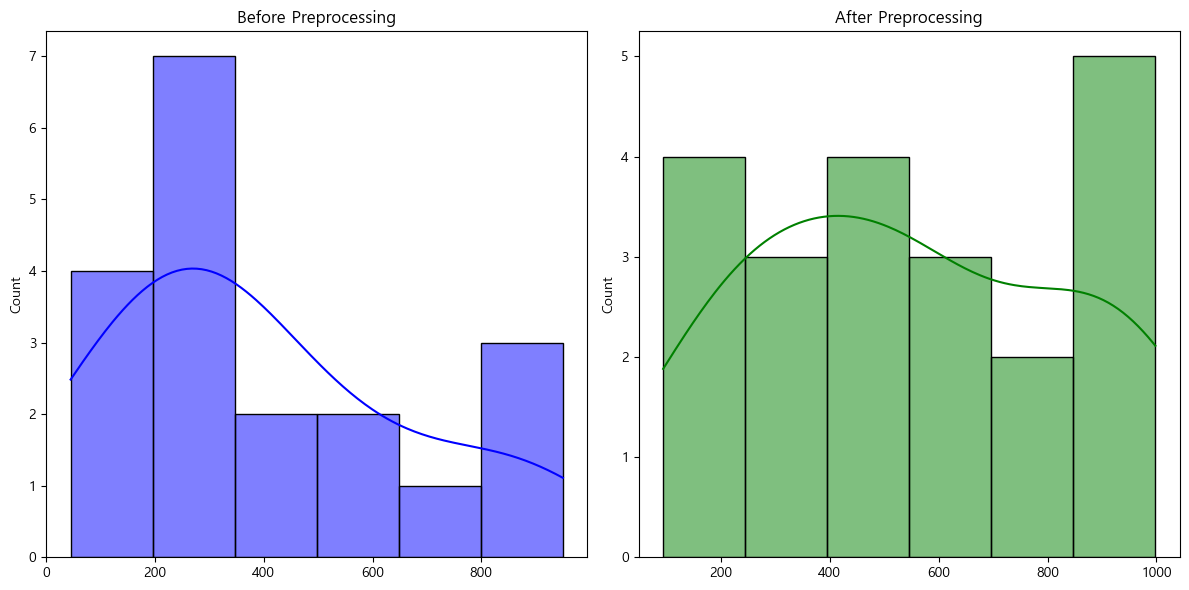

In [ ]:

# 범주형 데이터를 정수형으로 변환
feature_int = feature.apply(lambda x: hash(tuple(x)) % 1000)
absolute_feature_int = absolute_feature.apply(lambda x: hash(tuple(x)) % 1000)

# 전처리 전 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=feature_int, kde=True, color='blue')
plt.title('Before Preprocessing')

# 전처리 후 데이터 시각화
plt.subplot(1, 2, 2)
sns.histplot(data=absolute_feature_int, kde=True, color='green')
plt.title('After Preprocessing')

plt.tight_layout()
plt.show()



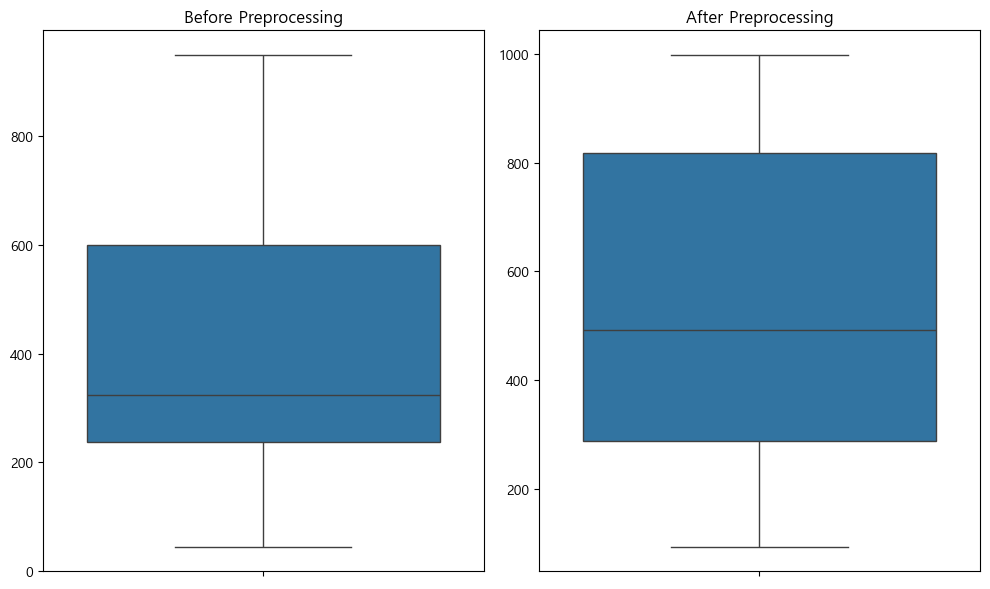

In [ ]:
### BOX_PLOT

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=feature_int)
plt.title('Before Preprocessing')

plt.subplot(1, 2, 2)
sns.boxplot(data=absolute_feature_int)
plt.title('After Preprocessing')

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_28400\3038065116.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=feature_int, label='Before Scaling', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_28400\3038065116.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=absolute_feature_int, label='After Scaling', shade=True)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


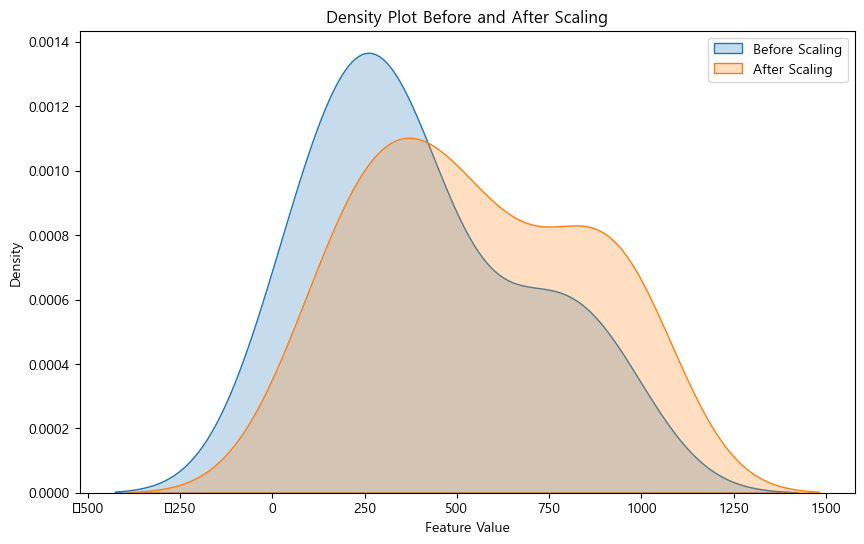

In [ ]:
### 밀도 추정 그래프 (Density Plot)

plt.figure(figsize=(10, 6))

# 스케일링 전 밀도 추정 그래프
sns.kdeplot(data=feature_int, label='Before Scaling', shade=True)

# 스케일링 후 밀도 추정 그래프
sns.kdeplot(data=absolute_feature_int, label='After Scaling', shade=True)

plt.title('Density Plot Before and After Scaling')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend()
plt.show()


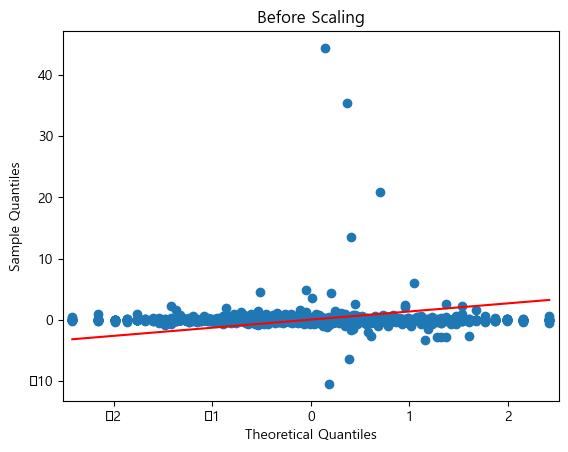

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# QQ 플롯 그리기
sm.qqplot(feature, line='s')
#sm.qqplot(absolute_feature, line='s')
plt.title('Before Scaling')
plt.show()


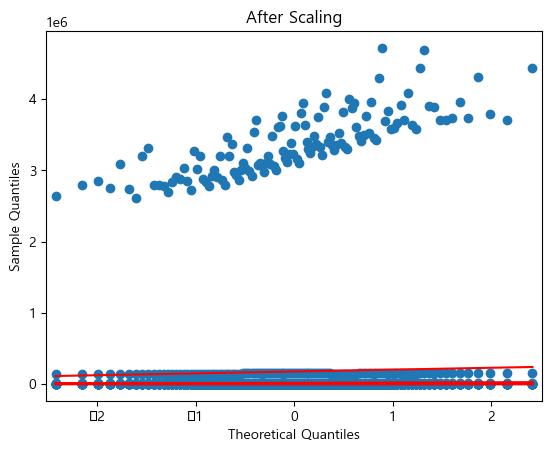

In [ ]:
sm.qqplot(absolute_feature, line='r')
plt.title('After Scaling')
plt.show()

# ↑여기까지가 시각화 자료 시도해본거임

## 전처리

##### #DIV/0! --> 0처리
- np.where(조건식, 바꿀 문자열(or 칼럼), 대상칼럼)
- df['B']  = np.where(df['B'] == 'a', 'aa', df['B'])

In [ ]:
feature['미국ISM'] = np.where(feature['미국ISM'] == '#DIV/0!', '0', feature['미국ISM'])
feature.loc[102]['미국ISM']

'0'

### OECD 라벨링

In [ ]:
### oecd 연도 -> datetime 형식으로 바꾸기
oecd = pd.read_excel('./oecdCLI_pre.xlsx')
oecd['날짜'] = pd.to_datetime(oecd['날짜'])                      

### 기준선 설정
threshold = 100  # 기준선 설정
oecd['label'] = (oecd['지수'] >= threshold).astype(int)

### label 갯수 세기
oecd['label'].value_counts()
oecd = oecd[['날짜', 'label']]
oecd.head(3)

C:\Users\admin\AppData\Local\Temp\ipykernel_2208\3367003019.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oecd['날짜'] = pd.to_datetime(oecd['날짜'])


,날짜,label
0,2013-03-01,0
1,2013-04-01,0
2,2013-05-01,0


In [ ]:
oecd['label'].value_counts()

label
0    65
1    65
Name: count, dtype: int64

In [ ]:
oe = pd.read_excel('./oecdCLI_pre.xlsx')
oe.head(3)

,날짜,지수,증감율
0,Mar-2013,99.45225,0.001685
1,Apr-2013,99.61071,0.001593
2,May-2013,99.73196,0.001217


### 데이터프레임 합치기

In [ ]:
df = pd.merge(feature, oecd, on='날짜', how='left')

In [ ]:
### 미국ISM --> 정수형으로 변환
df['미국ISM'] = df['미국ISM'].astype('float64')
df.dtypes

날짜                       datetime64[ns]
BSI(전망_계절)                      float64
GDP재화서비스(%)_전년동기대비_수출           float64
GDP재화서비스(%)_전년동기대비_수입           float64
GDP 대비 M1(배)                    float64
WTI값                            float64
건설수주액(십억원)                      float64
기계류내수출하지수(선박제외)(증감율)            float64
수출입물가비율(증감율)                    float64
경상수지(증감율)                       float64
미국생산자물가지수                       float64
소비자심리지수_증감률                     float64
실업급여지급건수_증감률                    float64
전국_종합매매가격지수_증감률                 float64
전체임금총액_증감률                      float64
불변증감률                           float64
계절증감률                           float64
전체실업률                           float64
청년실업율(15~29세)                   float64
전업생산지수                          float64
달러인덱스                           float64
미국ISM                           float64
미국PMI                           float64
미국건설지출                          float64
미국고용지표_취업자수 증감률                 float64


### Feature (연속형 변수) & Label EDA

1. feature EDA (연속형 변수 분포 확인)
- 히스토그램을 그림으로써 데이터의 분포 (정규분포, 이항분포, 왜도, 첨도 등)와 통계적 특성을 직관적으로 확인할 수 있음
- 이상치 탐지와 분포의 특성파악은 모델링에 중요한 단계
- 일부 모델은 변수가 정규분포를 따를 때 더 나은 성능을 보이기 때문에, 분포의 특성에 따라 데이터 변환(ex. 로그변환)을 고려하여 성능을 최적화할 수 있음

In [ ]:
df

,날짜,BSI(전망_계절),GDP재화서비스(%)_전년동기대비_수출,GDP재화서비스(%)_전년동기대비_수입,GDP 대비 M1(배),WTI값,건설수주액(십억원),기계류내수출하지수(선박제외)(증감율),수출입물가비율(증감율),경상수지(증감율),...,전체실업률,청년실업율(15~29세),전업생산지수,달러인덱스,미국ISM,미국PMI,미국건설지출,미국고용지표_취업자수 증감률,미국비농업고용자수_증감률,label
0,2013-04-01,0.000750,0.056,0.012,0.000000,-0.0388,0.408645,-0.010,0.008,-0.252263,...,0.000000,0.040541,0.012346,-0.016372,0.049123,-0.019964,0.00012,0.309859,0.001371,0
1,2013-05-01,0.000725,0.056,0.012,0.000000,-0.0159,-0.106928,0.018,0.007,0.906427,...,0.000000,0.000000,-0.002217,0.020254,-0.113712,-0.040741,-0.00017,0.150538,0.001575,0
2,2013-06-01,0.000749,0.056,0.012,0.000000,0.0499,-0.054766,0.001,0.003,-0.289690,...,0.033333,-0.038961,-0.003333,-0.000896,-0.064151,0.013514,0.00004,-0.163551,0.001315,0
3,2013-07-01,0.000724,0.020,0.010,0.000000,0.0877,0.063279,0.004,-0.003,0.020484,...,0.032258,0.094595,-0.002230,-0.021855,0.018145,0.000000,0.00005,-0.318436,0.000895,0
4,2013-08-01,0.000748,0.020,0.010,0.000000,0.0249,-0.031061,-0.023,-0.005,-0.082603,...,0.000000,0.024691,0.007821,0.007595,0.073267,0.028571,-0.00006,0.991803,0.001782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2023-08-01,0.000687,0.031,-0.003,-0.045455,0.0224,-0.143060,0.036,-0.005,0.315710,...,-0.107143,-0.133333,0.018083,0.019296,-0.027273,0.062500,0.00005,0.141304,0.001344,0
125,2023-09-01,0.000687,0.031,-0.003,-0.045455,0.0856,-0.197886,0.035,-0.005,0.121935,...,0.040000,0.076923,0.007993,0.021508,0.025701,-0.026369,0.00007,0.171429,0.001573,0
126,2023-10-01,0.000664,0.108,0.040,-0.047619,-0.1076,-0.159246,0.028,-0.002,0.224793,...,-0.038462,0.053571,-0.007048,0.006417,0.107062,0.031250,0.00005,-0.329268,0.001053,0
127,2023-11-01,0.000686,0.108,0.040,-0.047619,-0.0625,0.567958,-0.008,0.005,-0.476902,...,0.120000,0.000000,0.002662,-0.028790,-0.074074,0.006061,0.00004,0.103030,0.001160,0


C:\Users\admin\AppData\Local\Temp\ipykernel_2208\3227391981.py:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


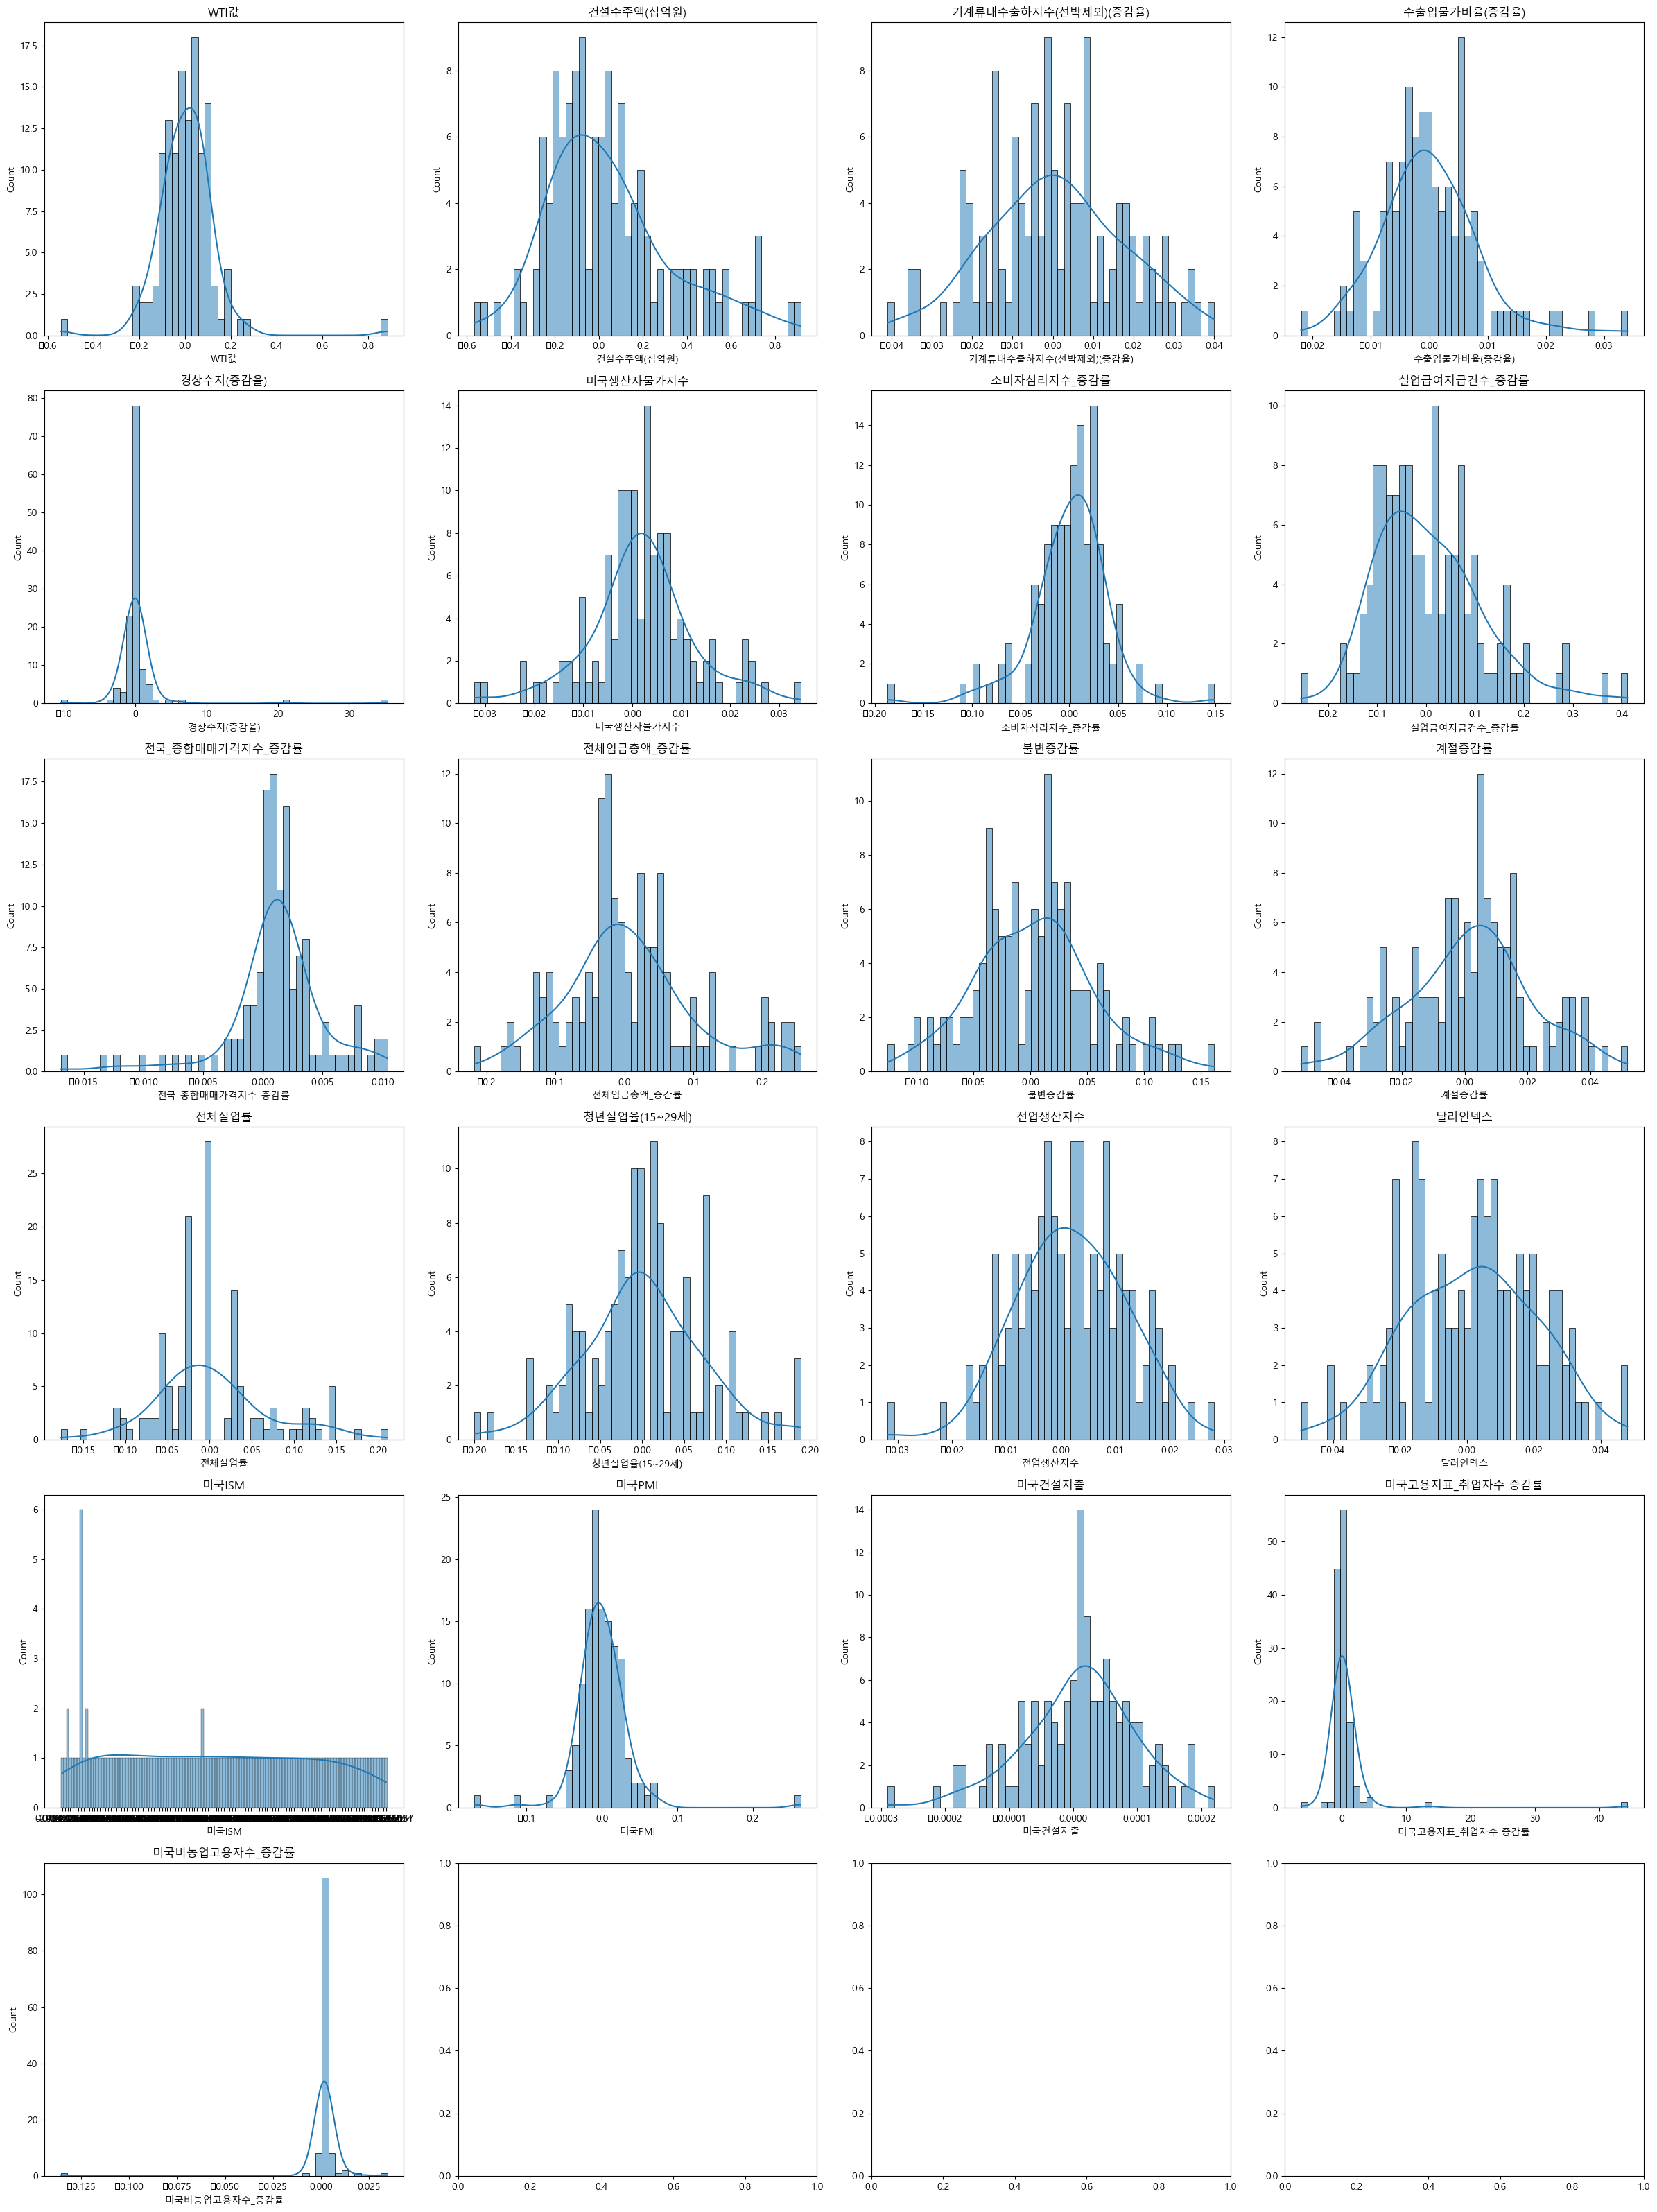

In [ ]:
df_columns = ['WTI값', '건설수주액(십억원)', '기계류내수출하지수(선박제외)(증감율)', '수출입물가비율(증감율)',
       '경상수지(증감율)', '미국생산자물가지수', '소비자심리지수_증감률', '실업급여지급건수_증감률',
       '전국_종합매매가격지수_증감률', '전체임금총액_증감률', '불변증감률', '계절증감률', '전체실업률',
       '청년실업율(15~29세)', '전업생산지수', '달러인덱스', '미국ISM', '미국PMI', '미국건설지출',
       '미국고용지표_취업자수 증감률', '미국비농업고용자수_증감률']

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(24, 32))  # 6행 4열 그리드를 생성

# 모든 컬럼에 대해 그래프를 그립니다.
for idx, col in enumerate(df_columns):
    r, c = divmod(idx, 4)
    sns.histplot(feature[col], bins=50, kde=True, ax=ax[r][c])
    ax[r][c].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
df.columns
df = df[['날짜', 'WTI값', '건설수주액(십억원)', '기계류내수출하지수(선박제외)(증감율)','수출입물가비율(증감율)', '경상수지(증감율)', '미국생산자물가지수', '소비자심리지수_증감률', '실업급여지급건수_증감률', '전국_종합매매가격지수_증감률', '전체임금총액_증감률', '불변증감률', '계절증감률', '전체실업률', '청년실업율(15~29세)', '전업생산지수', '달러인덱스', '미국ISM', '미국PMI', '미국건설지출', '미국고용지표_취업자수 증감률', '미국비농업고용자수_증감률', 'label']]
df.to_excel('./features_except_GDP.xlsx')

In [ ]:
df.columns

Index(['날짜', 'WTI값', '건설수주액(십억원)', '기계류내수출하지수(선박제외)(증감율)', '수출입물가비율(증감율)',
       '경상수지(증감율)', '미국생산자물가지수', '소비자심리지수_증감률', '실업급여지급건수_증감률',
       '전국_종합매매가격지수_증감률', '전체임금총액_증감률', '불변증감률', '계절증감률', '전체실업률',
       '청년실업율(15~29세)', '전업생산지수', '달러인덱스', '미국ISM', '미국PMI', '미국건설지출',
       '미국고용지표_취업자수 증감률', '미국비농업고용자수_증감률', 'label'],
      dtype='object')

2. 산점도 그래프를 통한 피쳐와 라벨의 관계탐색

C:\Users\admin\AppData\Local\Temp\ipykernel_2208\2362074016.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


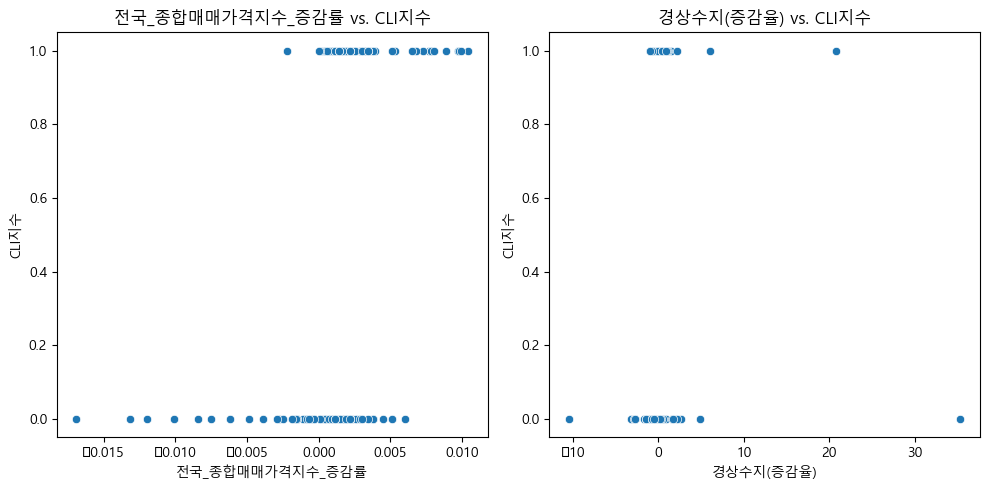

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  

# BSI와 label사이의 관계
sns.scatterplot(x=feature['전국_종합매매가격지수_증감률'], y=oecd['label'], ax=ax[0])
ax[0].set_title('전국_종합매매가격지수_증감률 vs. CLI지수')  
ax[0].set_xlabel('전국_종합매매가격지수_증감률') 
ax[0].set_ylabel('CLI지수')  

# MedInc와 target 사이의 관계
sns.scatterplot(x=feature['경상수지(증감율)'], y=oecd['label'], ax=ax[1])
ax[1].set_title('경상수지(증감율) vs. CLI지수')  
ax[1].set_xlabel('경상수지(증감율)') 
ax[1].set_ylabel('CLI지수') 

# 그래프 간 충돌을 방지하기 위해 자동으로 레이아웃 조정
plt.tight_layout() 
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 129 and the array at index 1 has size 130

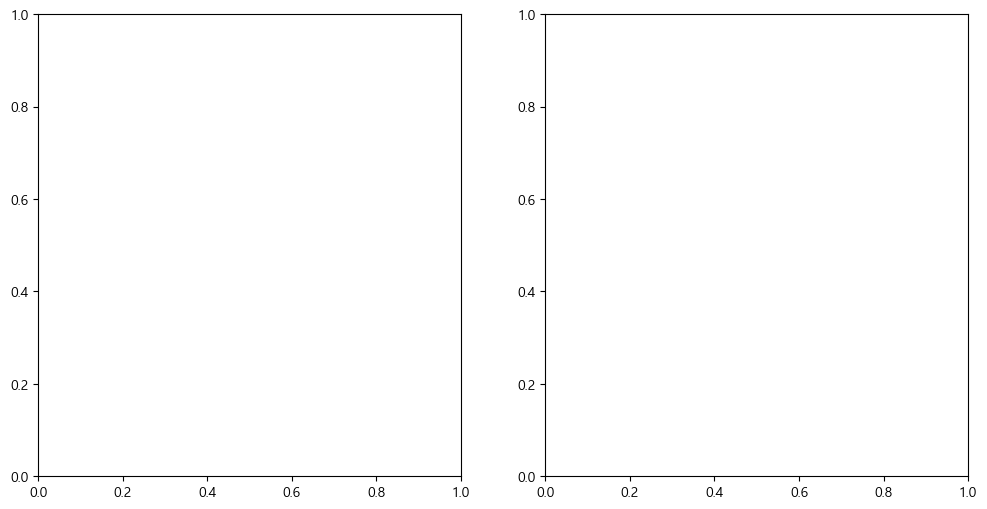

In [ ]:
### 산점도를 그리기 위한 subplot

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  

# BSI와 label사이의 관계
sns.regplot(x=feature['BSI(전망_계절)'], y=oecd['label'], data=df, line_kws={'color':'red'}, ax=axs[0])
axs[0].set_title('BSI vs. CLI지수')  
axs[0].set_xlabel('BSI') 
axs[0].set_ylabel('CLI지dd수')
axs[0].set_xlim(0, 10)
axs[0].set_ylim(0, 5.2)

plt.show()

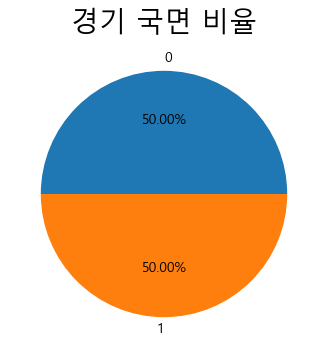

In [ ]:
### 파이 차트로 label 비율 확인
fig,ax = plt.subplots(figsize = (4,4))

credit_freq = oecd['label'].value_counts()

ax.pie(credit_freq, labels = credit_freq.index, autopct="%.2f%%")
plt.title('경기 국면 비율', size=20)
plt.show()


In [ ]:
### nan갑이 있는 행 제거
merged_df = merged_df.dropna(axis=0)

NameError: name 'merged_df' is not defined

### Feature Selection

1. 기본 성능 검증

In [ ]:
X = df.drop(['날짜', 'label'], axis=1)
y = df['label']

### 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 모델들 초기화
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=0)

### 모델 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

### 모델 예측
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lgb = lgb.predict(X_test)
y_pred_cat = cat.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 51, number of negative: 52
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 103, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495146 -> initscore=-0.019418
[LightGBM] [Info] Start training from score -0.019418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

(1) DecisionTreeClassifier

In [ ]:
print("DecisionTreeClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_dt, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_dt, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_dt, average='macro'):.2f}")
print(classification_report(y_test, y_pred_dt))
feature_importances_dt = pd.DataFrame(dt.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dt.reset_index(inplace=True)
feature_importances_dt.columns = ['feature', 'importance']
feature_importances_dt

DecisionTreeClassifier 성능:
정확도: 0.62
정밀도: 0.61
재현율: 0.61
F1 점수: 0.61
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.64      0.64      0.64        14

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.62      0.62      0.62        26



,feature,importance
0,전국_종합매매가격지수_증감률,0.224837
1,경상수지(증감율),0.131422
2,미국생산자물가지수,0.129924
3,미국ISM,0.123596
4,전체실업률,0.093324
5,실업급여지급건수_증감률,0.078393
6,미국건설지출,0.064437
7,전체임금총액_증감률,0.062142
8,청년실업율(15~29세),0.058636
9,수출입물가비율(증감율),0.033290


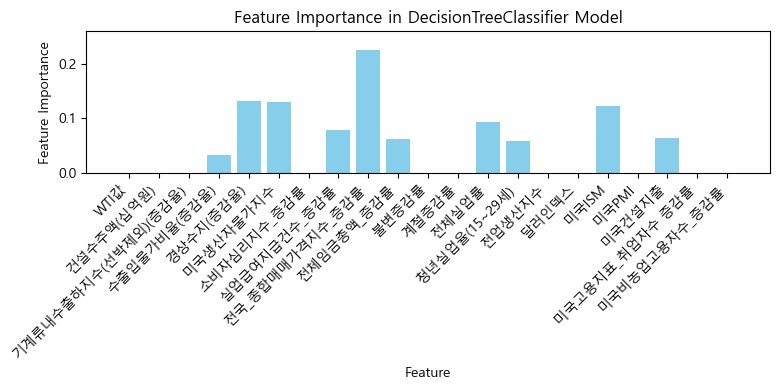

In [ ]:
low_importance_criteria = 0.001
ylimit_val = 0.26

# 피처 중요도를 수직 바 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(X.columns, dt.feature_importances_, color='skyblue')
# ax.hlines(low_importance_criteria, 0, len(X.columns)-1 , colors='r', linestyles='dotted', label='low criteria')

ax.set_xticks(range(len(X.columns)))  # X축에 대한 틱 위치 설정
ax.set_xticklabels(X.columns, rotation=45, ha="right")  # X축에 대한 레이블 설정
ax.set_xlabel("Feature")  # X축 레이블
ax.set_ylabel("Feature Importance")  # Y축 레이블
ax.set_ylim(0, ylimit_val)  # Y축 범위
ax.set_title("Feature Importance in DecisionTreeClassifier Model")  # 그래프 제목 설정

plt.tight_layout()  

In [ ]:
### 특정 값 이하의 특성 중요도 갖는 피처 제거
low_feature_importances = feature_importances_dt[feature_importances_dt['importance'] < low_importance_criteria]['feature'].values.tolist()
low_feature_importances

['WTI값',
 '달러인덱스',
 '미국고용지표_취업자수 증감률',
 '미국PMI',
 '불변증감률',
 '전업생산지수',
 '계절증감률',
 '건설수주액(십억원)',
 '소비자심리지수_증감률',
 '기계류내수출하지수(선박제외)(증감율)',
 '미국비농업고용자수_증감률']

In [ ]:
train_test1 = df.copy()

X = train_test1.drop(low_feature_importances + ['날짜','label'], axis=1); 
y = train_test1['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

display(f'Accuracy: {accuracy}')
display(f'Precision: {precision}')
display(f'Recall: {recall}')
display(f'F1-Score: {f1}')

'Accuracy: 0.5384615384615384'

'Precision: 0.5416666666666667'

'Recall: 0.5416666666666667'

'F1-Score: 0.5384615384615384'

(2) RandomForestClassifier

In [ ]:
print("RandomForestClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_rf, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_rf, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_rf, average='macro'):.2f}")
print(classification_report(y_test, y_pred_rf))
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rf.reset_index(inplace=True)
feature_importances_rf.columns = ['feature', 'importance']
feature_importances_rf

RandomForestClassifier 성능:
정확도: 0.65
정밀도: 0.65
재현율: 0.65
F1 점수: 0.65
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.69      0.64      0.67        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



,feature,importance
0,전국_종합매매가격지수_증감률,0.135173
1,미국생산자물가지수,0.081777
2,경상수지(증감율),0.076867
3,기계류내수출하지수(선박제외)(증감율),0.066161
4,전업생산지수,0.057089
5,미국PMI,0.056931
6,미국비농업고용자수_증감률,0.053044
7,청년실업율(15~29세),0.049006
8,실업급여지급건수_증감률,0.041024
9,전체임금총액_증감률,0.040761


Text(0.5, 1.0, 'Feature Importance in RandomForestClassifier Model')

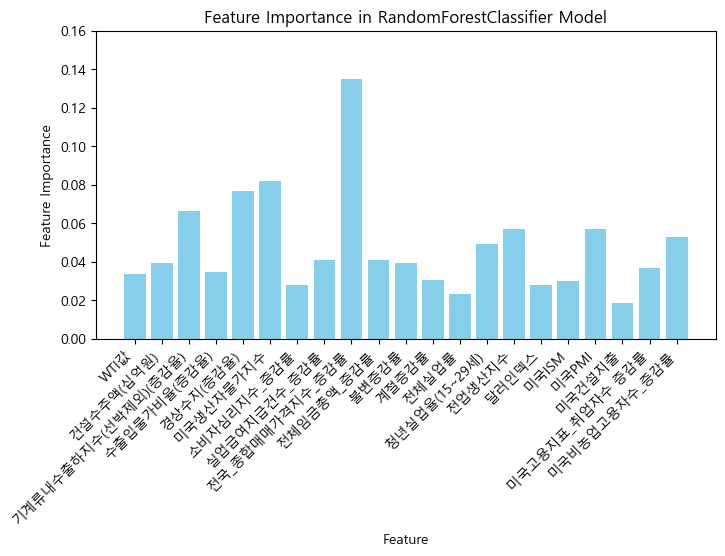

In [ ]:
low_importance_criteria = 0.015  
ylimit_val = 0.16

# 피처 중요도를 수직 바 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(X.columns, rf.feature_importances_, color='skyblue')
# ax.hlines(low_importance_criteria, 0, len(X.columns)-1 , colors='r', linestyles='dotted', label='low criteria')

ax.set_xticks(range(len(X.columns)))  # X축에 대한 틱 위치 설정
ax.set_xticklabels(X.columns, rotation=45, ha="right")  # X축에 대한 레이블 설정
ax.set_xlabel("Feature")  # X축 레이블
ax.set_ylabel("Feature Importance")  # Y축 레이블
ax.set_ylim(0, ylimit_val)  # Y축 범위
ax.set_title("Feature Importance in RandomForestClassifier Model")  # 그래프 제목 설정

(3) XGBClassifier

In [ ]:
print("XGBClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(classification_report(y_test, y_pred_xgb))
feature_importances_xgb = pd.DataFrame(xgb.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
feature_importances_xgb.reset_index(inplace=True)
feature_importances_xgb.columns = ['feature', 'importance']
feature_importances_xgb

XGBClassifier 성능:
정확도: 0.62
정밀도: 0.62
재현율: 0.62
F1 점수: 0.62
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.67      0.57      0.62        14

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.62        26
weighted avg       0.62      0.62      0.62        26



,feature,importance
0,전국_종합매매가격지수_증감률,0.148154
1,전체실업률,0.118210
2,전체임금총액_증감률,0.078261
3,전업생산지수,0.073500
4,실업급여지급건수_증감률,0.070775
5,건설수주액(십억원),0.068630
6,경상수지(증감율),0.068535
7,미국생산자물가지수,0.065350
8,미국ISM,0.057316
9,청년실업율(15~29세),0.052394


Text(0.5, 1.0, 'Feature Importance in XGBClassifier Model')

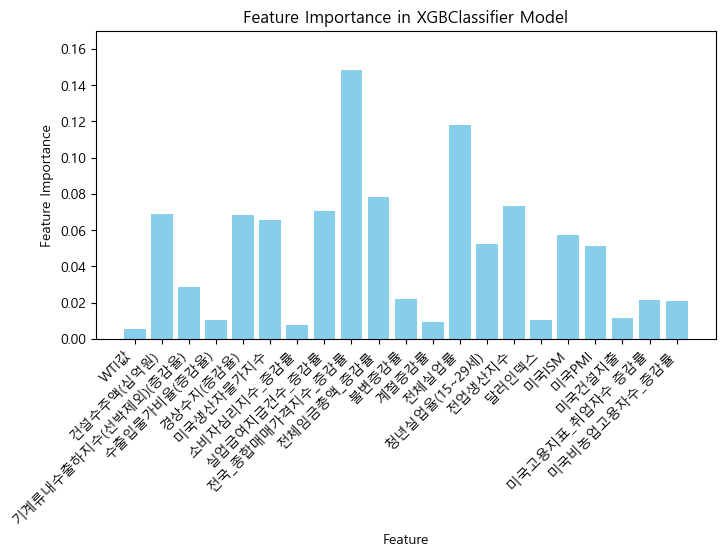

In [ ]:
low_importance_criteria = 0.015  
ylimit_val = 0.17

# 피처 중요도를 수직 바 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(X.columns, xgb.feature_importances_, color='skyblue')
# ax.hlines(low_importance_criteria, 0, len(X.columns)-1 , colors='r', linestyles='dotted', label='low criteria')

ax.set_xticks(range(len(X.columns)))  # X축에 대한 틱 위치 설정
ax.set_xticklabels(X.columns, rotation=45, ha="right")  # X축에 대한 레이블 설정
ax.set_xlabel("Feature")  # X축 레이블
ax.set_ylabel("Feature Importance")  # Y축 레이블
ax.set_ylim(0, ylimit_val)  # Y축 범위
ax.set_title("Feature Importance in XGBClassifier Model")  # 그래프 제목 설정

(4) LGBMClassifier

In [ ]:
y_pred_rf = lgb.predict(X_test)
print("LGBMClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_lgb):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(classification_report(y_test, y_pred_lgb))
feature_importances_lgb = pd.DataFrame(lgb.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
pd.DataFrame(feature_importances_lgb)

LGBMClassifier 성능:
정확도: 0.65
정밀도: 0.65
재현율: 0.65
F1 점수: 0.65
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.69      0.64      0.67        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



,importance
기계류내수출하지수(선박제외)(증감율),37
전국_종합매매가격지수_증감률,30
미국PMI,23
실업급여지급건수_증감률,23
경상수지(증감율),22
미국생산자물가지수,20
청년실업율(15~29세),19
불변증감률,17
미국비농업고용자수_증감률,17
전업생산지수,12


(5) CatBoostClassifier

In [ ]:
print("CatBoostClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_cat):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_cat, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_cat, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_cat, average='macro'):.2f}")
print(classification_report(y_test, y_pred_cat))
feature_importances_cat = pd.DataFrame(cat.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
pd.DataFrame(feature_importances_cat)

CatBoostClassifier 성능:
정확도: 0.65
정밀도: 0.65
재현율: 0.65
F1 점수: 0.65
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.67      0.71      0.69        14

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



,importance
전국_종합매매가격지수_증감률,15.892080
미국생산자물가지수,8.377710
기계류내수출하지수(선박제외)(증감율),7.625215
청년실업율(15~29세),6.394970
경상수지(증감율),6.011318
미국비농업고용자수_증감률,5.467927
전업생산지수,5.376006
실업급여지급건수_증감률,4.626149
미국PMI,4.234855
건설수주액(십억원),4.044414


Text(0.5, 1.0, 'Feature Importance in Linear Regression Model')

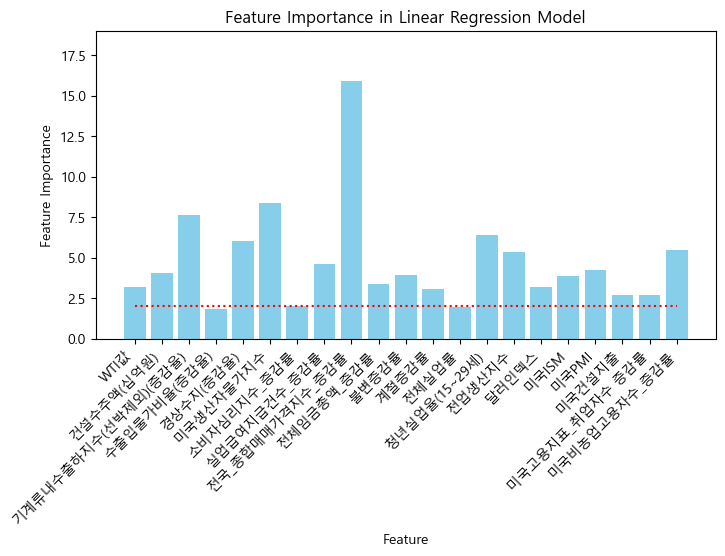

In [ ]:
low_importance_criteria = 2 
ylimit_val = 19

# 피처 중요도를 수직 바 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(X.columns, cat.feature_importances_, color='skyblue')
ax.hlines(low_importance_criteria, 0, len(X.columns)-1 , colors='r', linestyles='dotted', label='low criteria')

ax.set_xticks(range(len(X.columns)))  # X축에 대한 틱 위치 설정
ax.set_xticklabels(X.columns, rotation=45, ha="right")  # X축에 대한 레이블 설정
ax.set_xlabel("Feature")  # X축 레이블
ax.set_ylabel("Feature Importance")  # Y축 레이블
ax.set_ylim(0, ylimit_val)  # Y축 범위
ax.set_title("Feature Importance in Linear Regression Model")  # 그래프 제목 설정

2. 특정 값 이하의 특성 중요도 갖는 피처 제거

#### 모델링

### Feature Selection
1. Reculsive Feature Elimination
2. Select From model - random forest
3. Select from model - LogisticRegression
4. Permutation Importance

1. Reculsive Feature Elimination
- 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 반복